In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from scipy import stats
import sample_utils

%matplotlib inline

# TRUE DATA
#### REQUIRED: 2020_LER_20200804_V006.xlsx' file

In [2]:
name = '2020_LER_20200922_V007_testset_edit.csv'
datatype = 'n'

dataset = sample_utils.get_dataset(name, datatype)
num_in_cycle = 50

# real
real = dataset.test_Y

# y mean and std
y_mean = np.mean(dataset.train_Y, axis=0, dtype=np.float32)
y_std = np.std(dataset.train_Y, axis=0, dtype=np.float32)

test_num = int(real.shape[0]/num_in_cycle)

============ Data load =============
STEP 1: CHECK DATA SIZE
X data shape:  (11800, 5) X per cycle data shape: (236, 5)
Y data shape:  (11800, 6) Y per cycle data shape: (236, 6)
STEP 2: CHECK NAN DATA
any nan in X?:  []
any nan in Y?:  [[ 4450     0]
 [ 4450     1]
 [ 4450     2]
 ...
 [11799     3]
 [11799     4]
 [11799     5]]

============= Data split ==============
STEP1: split All data
Same number of x data and y data
train X: (4400, 5) train Y: (4400, 6)
val X: (750, 5) val Y: (750, 6)
test X: (750, 5) test Y: (750, 6)
x mean, std:  [  0.4169446  52.178642  121.815414    1.          0.       ] [ 0.20426613 26.91275    53.589043    0.          0.        ]
y mean, std:  [2.2097402e-12 4.1623207e-05 1.6310687e-05 3.4307730e-01 3.5102329e-01
 6.1670391e+01] [7.7363783e-13 2.1860972e-06 8.3510133e-07 7.4649407e-03 6.7155589e-03
 3.2870254e-01]

STEP2: split cycle data
Same number of x data and y data
train X: (88, 5) train Y: (88, 6)
val X: (15, 5) val Y: (15, 6)
test X: (15, 5) tes

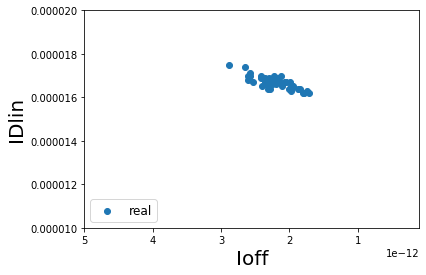

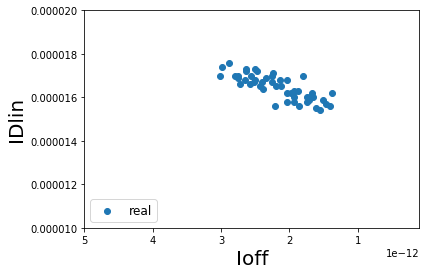

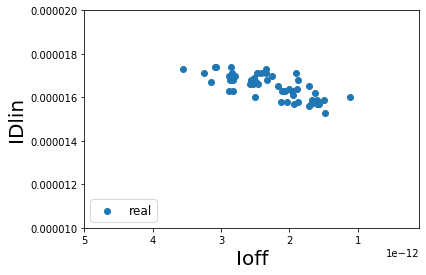

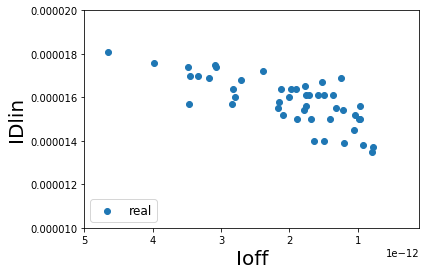

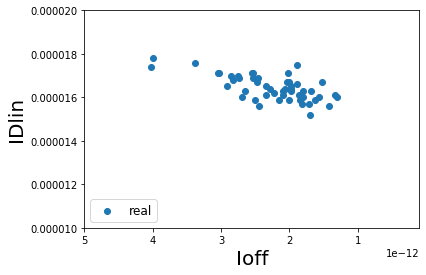

In [3]:
# TEST SET Visualize


import pandas as pd
import numpy as np

############################################## CHANGE HERE ######################################################

# factor : test set index ( hard ones: 2 3 7 12 14 )
factor_list = [2, 3, 7, 12, 14]

#################################################################################################################

for i in range(len(factor_list)):
    start = num_in_cycle * factor_list[i]
    end = num_in_cycle * (factor_list[i]+1)

    plt.scatter(dataset.test_Y[start:end,0],dataset.test_Y[start:end,2], label='real')
    plt.xlim(5e-12, 1e-13)
    plt.ylim(1e-5, 2e-5)
    plt.legend(loc='lower left', fontsize=12)
    plt.xlabel("Ioff", fontsize=20)
    plt.ylabel("IDlin", fontsize=20)
    plt.show()

# GENERATED DATA

#### required: generated sample in 'npy' file 
#### in ( test_num * sample_num, 6 ) shape 

In [12]:

name = 'date_201002_data_2020_LER_20200922_V007_testset_edit.csv_model_mlp_{}_lr_5e-05_0.0001_0.0005_gan_hidden_dim_{}_batch_size_{}_noise_d_{}_sample_num_50'

gan_model_type = 'gan2'

if gan_model_type == 'gan2' or gan_model_type == 'gan3':
    name += '_pdrop_{}'
    
name += '.npy'

i=0
EMD_check_list = []
FID_check_list = []

# for batch_size in [10, 25, 50, 100]:
#     for noise_d in [100, 500]:
#         for hidden_dim in [50, 100]:
# #            
#             preview = name.format(gan_model_type, hidden_dim, batch_size, noise_d)
                
#             print("index: ", i, "/", gan_model_type, "/ hid:", hidden_dim, "/ batch:", batch_size, "/ noise:", noise_d)
#             preview_result = np.load(preview, allow_pickle = True)
                
#             preview_sample_num = int(len(preview_result)/test_num)
#             print("GENERATED SAMPLE shape: ", preview_result.shape)
#             print("GENERATED SAMPLE NUM:", preview_sample_num)
            
#             y_min = np.min(np.array([np.min(real, axis=0), np.min(preview_result, axis=0)]), axis=0)
#             y_max = np.max(np.array([np.max(real, axis=0), np.max(preview_result, axis=0)]), axis=0)
            
#             preview_score, _ = sample_utils.FID_score_each_X((preview_result-y_mean) / y_std, (real - y_mean) / y_std, num_in_gen=preview_sample_num, num_in_cycle=num_in_cycle)
#             print('FID_score_mean', preview_score)
#             preview_EMD_score, _ = sample_utils.EMD_each_X((preview_result-y_min) / (y_max-y_min), (real - y_min) / (y_max-y_min), num_in_gen=preview_sample_num, num_in_cycle=num_in_cycle)
#             print('EMD_score_mean', preview_EMD_score)
#             print()

#             i += 1
                
#             EMD_check_list.append(preview_EMD_score)
#             FID_check_list.append(preview_score)
            
for batch_size in [10, 25, 50, 100]:
    for noise_d in [100, 500]:
        for hidden_dim in [50, 100]:
            for pdrop in [0.2, 0.5, 0.8]:
#            
                if i != 32 and i != 8 and i != 14 and i!=20 and i!=31 and i!=37 and i!=40 and i!=41:

                    preview = name.format(gan_model_type, hidden_dim, batch_size, noise_d, pdrop)

                    print("index: ", i, "/", gan_model_type, "/ hid:", hidden_dim, "/ batch:", batch_size, "/ noise:", noise_d, "/ pdrop:", pdrop)
                    preview_result = np.load(preview, allow_pickle = True)

                    preview_sample_num = int(len(preview_result)/test_num)
                    print("GENERATED SAMPLE shape: ", preview_result.shape)
                    print("GENERATED SAMPLE NUM:", preview_sample_num)

                    y_min = np.min(np.array([np.min(real, axis=0), np.min(preview_result, axis=0)]), axis=0)
                    y_max = np.max(np.array([np.max(real, axis=0), np.max(preview_result, axis=0)]), axis=0)

                    preview_score, _ = sample_utils.FID_score_each_X((preview_result-y_mean) / y_std, (real - y_mean) / y_std, num_in_gen=preview_sample_num, num_in_cycle=num_in_cycle)
                    print('FID_score_mean', preview_score)
                    preview_EMD_score, _ = sample_utils.EMD_each_X(preview_result / y_std, real/y_std, num_in_gen=preview_sample_num, num_in_cycle=num_in_cycle)
                    print('EMD_score_mean', preview_EMD_score)
                    print()

                    EMD_check_list.append(preview_EMD_score)
                    FID_check_list.append(preview_score)
                else:
                    preview = name.format(gan_model_type, hidden_dim, batch_size, noise_d, pdrop)

                    print("index: ", i, "/", gan_model_type, "/ hid:", hidden_dim, "/ batch:", batch_size, "/ noise:", noise_d, "/ pdrop:", pdrop)
                    preview_result = np.load(preview, allow_pickle = True)

                    preview_sample_num = int(len(preview_result)/test_num)
                    print("GENERATED SAMPLE shape: ", preview_result.shape)
                    print("GENERATED SAMPLE NUM:", preview_sample_num)
                    #print(preview_result)
                    # print(y_std)
                    for numbers in range(len(preview_result)):
                        for number in range(len(preview_result[numbers])):
                            if preview_result[numbers][number] < 0:
                                print(preview_result[numbers][number])
                                print(number)
                    
#                     for numbers in range(len(real)):
#                         for number in range(len(real[numbers])):
#                             if real[numbers][number] < 0:
#                                 print(real[numbers][number])
                                
#                     preview_EMD_score, _ = sample_utils.EMD_each_X(preview_result / y_std, real/y_std, num_in_gen=preview_sample_num, num_in_cycle=num_in_cycle)
#                     print('EMD_score_mean', preview_EMD_score)
                    
                i += 1


EMD_check_list = np.array(EMD_check_list)
FID_check_list = np.array(FID_check_list)
    
print("EMD argsort: ", EMD_check_list.argsort())
print("FID argsort: ", FID_check_list.argsort())
                





index:  0 / gan2 / hid: 50 / batch: 10 / noise: 100 / pdrop: 0.2
GENERATED SAMPLE shape:  (750, 6)
GENERATED SAMPLE NUM: 50
FID_score_mean 0.5089946073423045
EMD_score_mean 0.6666387259960175

index:  1 / gan2 / hid: 50 / batch: 10 / noise: 100 / pdrop: 0.5
GENERATED SAMPLE shape:  (750, 6)
GENERATED SAMPLE NUM: 50
FID_score_mean 0.6156800597182299
EMD_score_mean 0.6285741289456686

index:  2 / gan2 / hid: 50 / batch: 10 / noise: 100 / pdrop: 0.8
GENERATED SAMPLE shape:  (750, 6)
GENERATED SAMPLE NUM: 50
FID_score_mean 0.5144970441990994
EMD_score_mean 0.6419209043184916

index:  3 / gan2 / hid: 100 / batch: 10 / noise: 100 / pdrop: 0.2
GENERATED SAMPLE shape:  (750, 6)
GENERATED SAMPLE NUM: 50
FID_score_mean 0.5563818500799187
EMD_score_mean 0.6398362060387929

index:  4 / gan2 / hid: 100 / batch: 10 / noise: 100 / pdrop: 0.5
GENERATED SAMPLE shape:  (750, 6)
GENERATED SAMPLE NUM: 50
FID_score_mean 0.551506741574304
EMD_score_mean 0.6651164005200069

index:  5 / gan2 / hid: 100 / batc

In [38]:

############################################### CHANGE HERE ##################################################

# type your result name
total_name = 'date_201002_data_2020_LER_20200922_V007_testset_edit.csv_model_mlp_gan2_lr_5e-05_0.0001_0.0005_gan_hidden_dim_50_batch_size_25_noise_d_500_sample_num_50_pdrop_0.2.npy'

##############################################################################################################

total_result = np.load(total_name, allow_pickle=True)

sample_num = int(len(total_result)/test_num)
print("GENERATED SAMPLE shape: ",total_result.shape)
print("GENERATED SAMPLE NUM:", sample_num)

# checking nan value
print("any nan in real?: ", np.argwhere(np.isnan(real)))
print("any nan in generated?: ", np.argwhere(np.isnan(total_result)))


GENERATED SAMPLE shape:  (750, 6)
GENERATED SAMPLE NUM: 50
any nan in real?:  []
any nan in generated?:  []


# FID SCORE 

In [39]:
score, FID_score_list = sample_utils.FID_score_each_X((total_result-y_mean) / y_std, (real - y_mean) / y_std, num_in_gen=sample_num, num_in_cycle=num_in_cycle)
print('FID_score_mean', score)

score = np.array(score)
FID_score_list = np.array(FID_score_list)

FID_std = np.sqrt(np.mean((score - FID_score_list)**2))

for i in range(len(FID_score_list)):
    print("FID_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, FID_score_list[i], (FID_score_list[i]-score)/FID_std))

# y_min = np.min(np.array([np.min(real, axis=0), np.min(total_result, axis=0)]), axis=0)
# y_max = np.max(np.array([np.max(real, axis=0), np.max(total_result, axis=0)]), axis=0)

EMD_score, EMD_score_list = sample_utils.EMD_each_X(total_result/y_std, real/y_std, num_in_gen=sample_num, num_in_cycle=num_in_cycle)
print('EMD_score_mean', EMD_score)

EMD_score = np.array(EMD_score)
EMD_score_list = np.array(EMD_score_list)

EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list)**2))

for i in range(len(EMD_score_list)):
    print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list[i], (EMD_score_list[i]-EMD_score)/EMD_std))
# A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

EMD_score_list = np.array(EMD_score_list)

print("FID argsort: ", FID_score_list.argsort())
print("EMD argsort: ", EMD_score_list.argsort())


FID_score_mean 0.25538824810998373
FID_score for each X factor 0 	 score 0.044146 	 dev -0.842947
FID_score for each X factor 1 	 score 0.601445 	 dev 1.380914
FID_score for each X factor 2 	 score 0.058439 	 dev -0.785912
FID_score for each X factor 3 	 score 0.066153 	 dev -0.755130
FID_score for each X factor 4 	 score 0.053673 	 dev -0.804930
FID_score for each X factor 5 	 score 0.021767 	 dev -0.932248
FID_score for each X factor 6 	 score 0.912134 	 dev 2.620694
FID_score for each X factor 7 	 score 0.096874 	 dev -0.632538
FID_score for each X factor 8 	 score 0.255729 	 dev 0.001359
FID_score for each X factor 9 	 score 0.257948 	 dev 0.010216
FID_score for each X factor 10 	 score 0.217399 	 dev -0.151595
FID_score for each X factor 11 	 score 0.538474 	 dev 1.129633
FID_score for each X factor 12 	 score 0.445334 	 dev 0.757965
FID_score for each X factor 13 	 score 0.095064 	 dev -0.639760
FID_score for each X factor 14 	 score 0.166244 	 dev -0.355722
EMD_score_mean 0.6487

# FEATURE DISTRIBUTION



In [7]:
# import pandas as pd
# import numpy as np
# import seaborn as sns

# ############################################### CHANGE HERE ##################################################
# for factor in range(15):
# # type the X index of test sample ( 0 ~ 14) ( hard ones: 2 3 7 12 14 )
#     print("factor", factor)
#     ##############################################################################################################
#     """
#     for i in range(6):
#         print(np.min(total_result[:,i]))
#         print(np.max(total_result[:,i]))
#         print(np.min(real[:,i]))
#         print(np.max(real[:,i]))
#     """

#     # generated sample
#     gan_matrix_plot = total_result[factor * sample_num:(factor+1)*sample_num]
#     print("Generated sample shape:", gan_matrix_plot.shape)

#     # real sample
#     real_matrix_plot = real[factor * num_in_cycle:(factor+1)*num_in_cycle]
#     print("real sample shape:", real_matrix_plot.shape)
#     print()

#     # Assigning class(generated: 0, real:1 ) for visualization

#     print("Assigning class for visualization (generated: 0, real:1 )")

#     gan_cls = np.ones((sample_num, 1))
#     print("generated sample class shape:", gan_cls.shape)
#     real_cls = np.zeros((50, 1))
#     print("real sample class shape:", real_cls.shape)

#     temp1 = np.hstack([gan_matrix_plot, gan_cls])
#     temp2 = np.hstack([real_matrix_plot, real_cls])

#     # TOTAL PANDAS DATA
#     total_matrix_plot = np.vstack([temp1, temp2])
#     # print(total_matrix_plot.shape)

#     # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
#     df1 = pd.DataFrame(total_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
#     # print(df1)
    
#     # min, max for generated Y value ( used for scatter plot limit standard )

#     min_list = total_matrix_plot.min(axis=0)
#     max_list = total_matrix_plot.max(axis=0)
#     print("minimum y value for each varaible:", min_list)
#     print("maximum y value for each varaible:", max_list)

#     X = dataset.test_X_per_cycle[factor]

#     print("X input", X)

#     g = sns.pairplot(df1, hue = 'classes')
#     for i in range(6):
#         g.fig.suptitle("CGAN Amp: {:.4f}, Corr x: {:.4f}, Corr y: {:.4f}, FID: {:.5f} EMD: {:.5f}".format(X[0], X[1], X[2], FID_score_list[factor], EMD_score_list[factor]), y=1.04, fontsize=30)
#         g.axes[i,i].set_xlim((min_list[i],max_list[i]))
#         g.axes[i,i].set_ylim((min_list[i],max_list[i]))
#     plt.show()


#     ### 파란색이 real 주황색이 generated


In [8]:
# import pandas as pd
# import numpy as np
# import seaborn as sns


# min1_per_out_v = real.min(axis=0)
# max1_per_out_v = real.max(axis=0)
# print("minimum y value for each varaible:", min1_per_out_v)
# print("maximum y value for each varaible:", max1_per_out_v)

# min2_per_out_v = total_result.min(axis=0)
# max2_per_out_v = total_result.max(axis=0)
# print("minimum y value for each varaible:", min2_per_out_v)
# print("maximum y value for each varaible:", max2_per_out_v)

# min_per_out_v = []
# max_per_out_v = []

# for i in range(6):
#     min_per_out_v.append(min1_per_out_v[i] if min1_per_out_v[i] < min2_per_out_v[i] else min2_per_out_v[i])
#     max_per_out_v.append(max1_per_out_v[i] if max1_per_out_v[i] > max2_per_out_v[i] else max2_per_out_v[i])

# print(min_per_out_v)
# print(max_per_out_v)

# ############################################### CHANGE HERE ##################################################
# for factor in range(15):
# # type the X index of test sample ( 0 ~ 14) ( hard ones: 2 3 7 12 14 )
#     print("factor", factor)
#     ##############################################################################################################
#     """
#     for i in range(6):
#         print(np.min(total_result[:,i]))
#         print(np.max(total_result[:,i]))
#         print(np.min(real[:,i]))
#         print(np.max(real[:,i]))
#     """

#     # generated sample
#     gan_matrix_plot = total_result[factor * sample_num:(factor+1)*sample_num]
#     print("Generated sample shape:", gan_matrix_plot.shape)

#     # real sample
#     real_matrix_plot = real[factor * num_in_cycle:(factor+1)*num_in_cycle]
#     print("real sample shape:", real_matrix_plot.shape)
#     print()

#     # Assigning class(generated: 0, real:1 ) for visualization

#     print("Assigning class for visualization (generated: 0, real:1 )")

#     gan_cls = np.ones((sample_num, 1))
#     print("generated sample class shape:", gan_cls.shape)
#     real_cls = np.zeros((50, 1))
#     print("real sample class shape:", real_cls.shape)

#     temp1 = np.hstack([gan_matrix_plot, gan_cls])
#     temp2 = np.hstack([real_matrix_plot, real_cls])

#     # TOTAL PANDAS DATA
#     total_matrix_plot = np.vstack([temp1, temp2])
#     # print(total_matrix_plot.shape)

#     # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
#     df1 = pd.DataFrame(total_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
#     # print(df1)

#     X = dataset.test_X_per_cycle[factor]

#     print("X input", X)

#     g = sns.pairplot(df1, hue = 'classes')
#     for i in range(6):
#         g.fig.suptitle("CGAN Amp: {:.4f}, Corr x: {:.4f}, Corr y: {:.4f}, FID: {:.5f} EMD: {:.5f}".format(X[0], X[1], X[2], FID_score_list[factor], EMD_score_list[factor]), y=1.04, fontsize=30)
#         g.axes[i,i].set_xlim((min_per_out_v[i], max_per_out_v[i]))
#         g.axes[i,i].set_ylim((min_per_out_v[i], max_per_out_v[i]))
#     plt.show()


#     ### 파란색이 real 주황색이 generated


# SCATTER PLOT two variable

check sample_num:  50


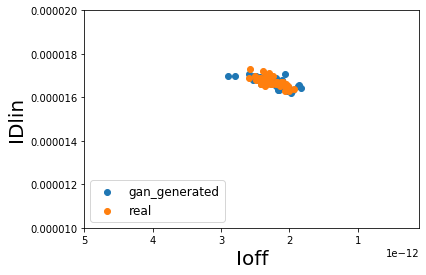

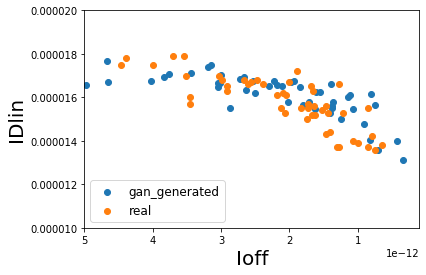

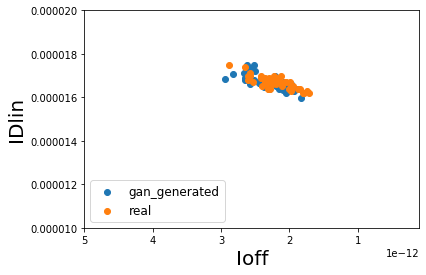

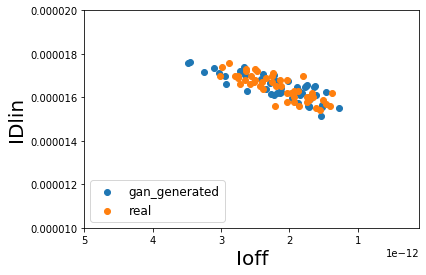

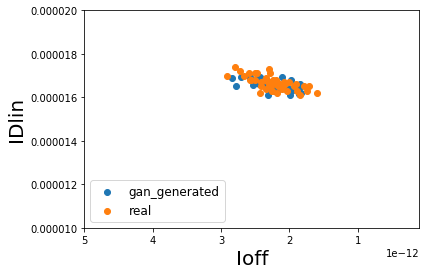

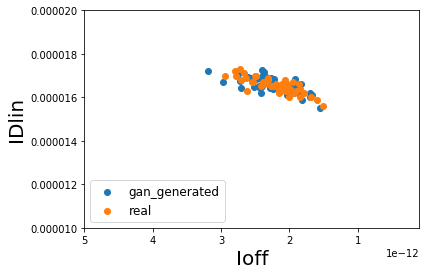

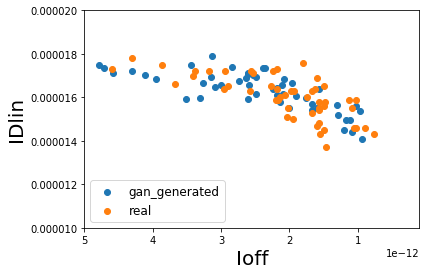

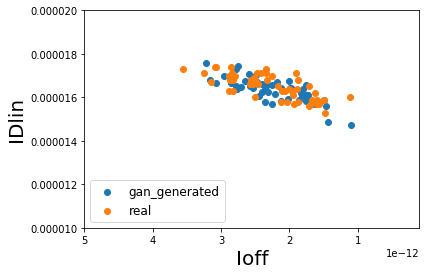

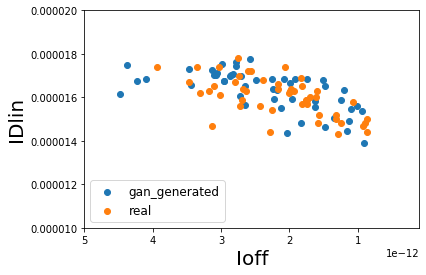

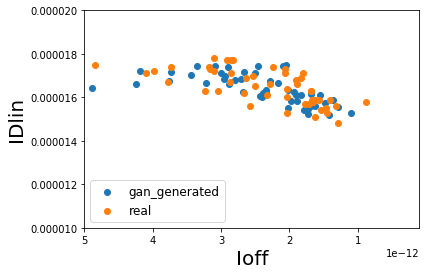

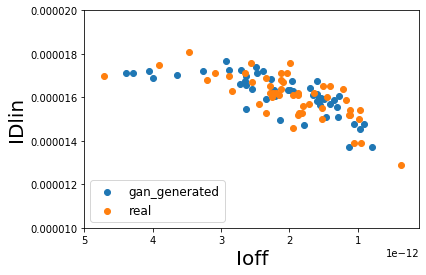

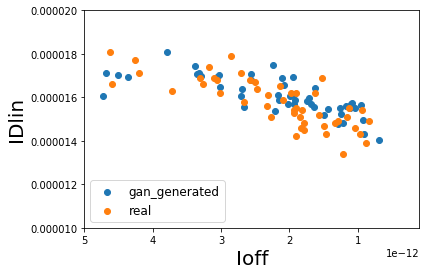

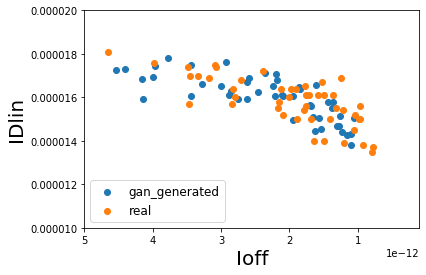

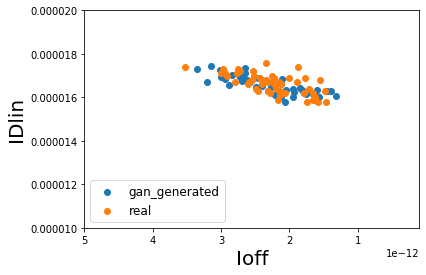

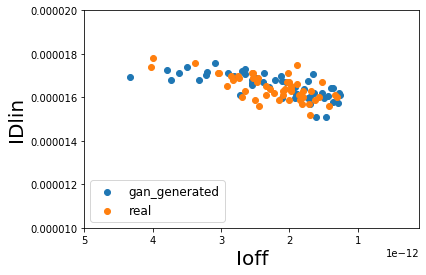

In [9]:
# ( Ioff / IDlin )

print("check sample_num: ", sample_num)

factor_plot = sample_num // num_in_cycle
for idx in range(15):
    start = num_in_cycle * idx
    end = num_in_cycle * (idx+1)
    plt.scatter(total_result[start*factor_plot:end*factor_plot,0],total_result[start*factor_plot:end*factor_plot,2], label='gan_generated')
    plt.scatter(real[start:end,0],real[start:end,2], label='real')
    plt.xlim(5e-12, 1e-13)
    plt.ylim(1e-5, 2e-5)
    plt.legend(loc='lower left', fontsize=12)
    plt.xlabel("Ioff", fontsize=20)
    plt.ylabel("IDlin", fontsize=20)
    plt.show()

check sample_num:  50


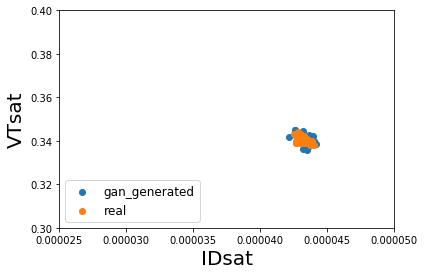

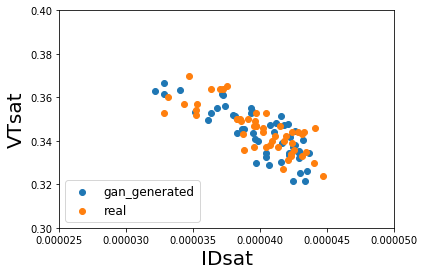

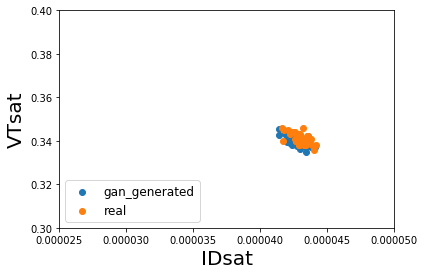

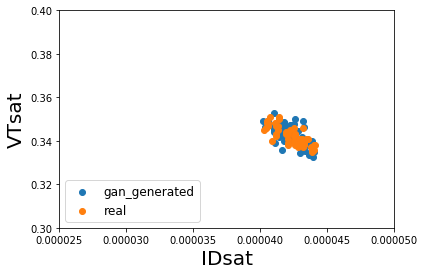

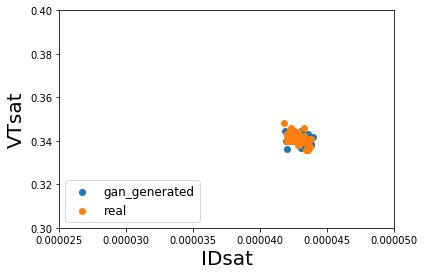

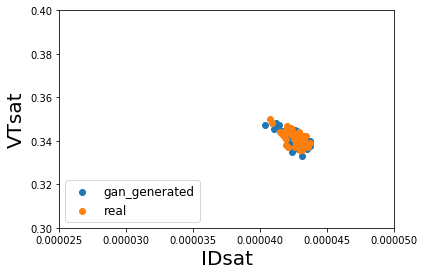

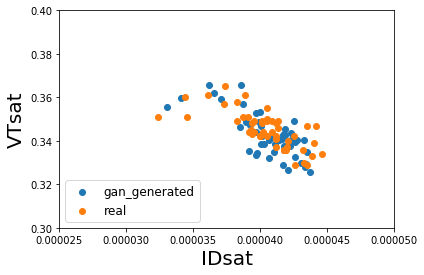

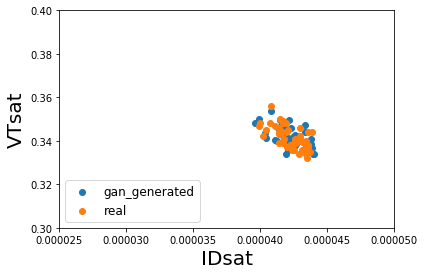

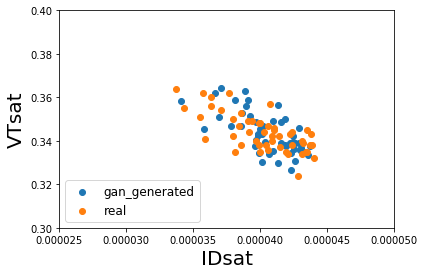

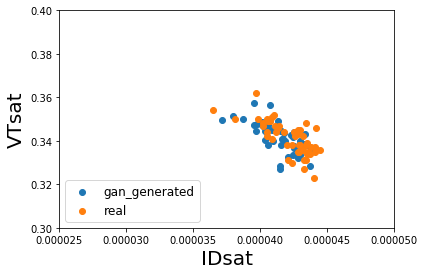

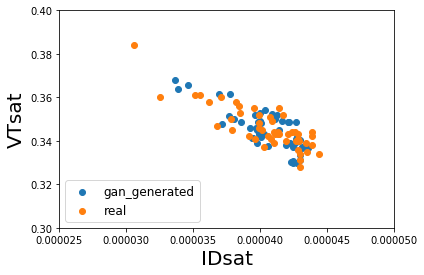

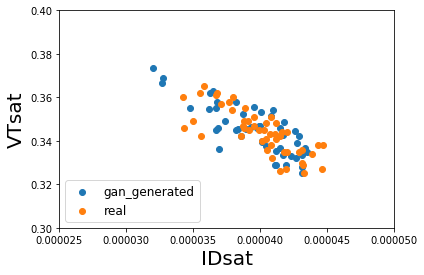

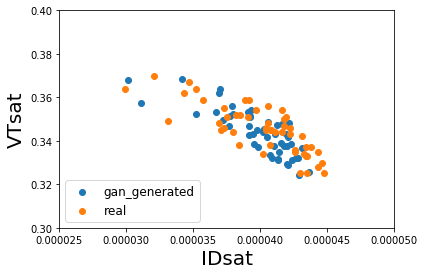

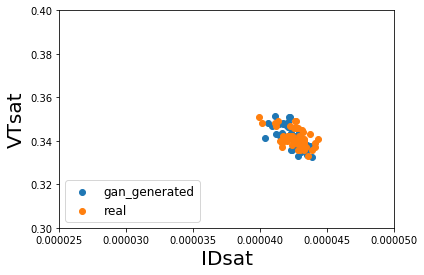

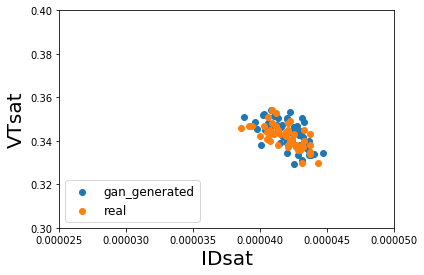

In [10]:
# ( IDsat / VTsat )

print("check sample_num: ", sample_num)

factor = sample_num // num_in_cycle
for idx in range(15):
    start = num_in_cycle * idx
    end = num_in_cycle * (idx+1)
    plt.scatter(total_result[start*factor_plot:end*factor_plot,1],total_result[start*factor_plot:end*factor_plot,3], label='gan_generated')
    plt.scatter(real[start:end,1],real[start:end,3], label='real')
    plt.xlim(2.5e-5, 5e-5)
    plt.ylim(3e-1, 4e-1)
    plt.legend(loc='lower left', fontsize=12)
    plt.xlabel("IDsat", fontsize=20)
    plt.ylabel("VTsat", fontsize=20)
    plt.show()

# SPECIFIC Test data (additional)

In [28]:
name = '2020_LER_20200922_testset.csv'
datatype = 'n'

dataset_test = sample_utils.get_dataset_test(name, datatype)
num_in_cycle =[232, 289, 277, 253, 255] 
num_of_cycle = 5

# real
real_test = dataset_test.test_Y

print(real_test)


1306
       amp.  corr.x   corr.y  PNMOS_N
0     0.625  17.007  173.857        1
1     0.625  17.007  173.857        1
2     0.625  17.007  173.857        1
3     0.625  17.007  173.857        1
4     0.625  17.007  173.857        1
...     ...     ...      ...      ...
1301  0.637  69.149   65.330        1
1302  0.637  69.149   65.330        1
1303  0.637  69.149   65.330        1
1304  0.637  69.149   65.330        1
1305  0.637  69.149   65.330        1

[1306 rows x 4 columns]
              Ioff     IDSAT     IDLIN  VTSAT  VTLIN      SS
0     1.960000e-12  0.000042  0.000016  0.343  0.353  61.501
1     6.140000e-13  0.000036  0.000014  0.370  0.377  60.804
2     7.440000e-13  0.000032  0.000014  0.370  0.374  61.200
3     1.480000e-12  0.000041  0.000016  0.352  0.358  61.429
4     1.930000e-12  0.000044  0.000018  0.344  0.353  61.569
...            ...       ...       ...    ...    ...     ...
1301  2.530000e-12  0.000042  0.000017  0.339  0.348  61.908
1302  1.950000e-12  0.0000

232


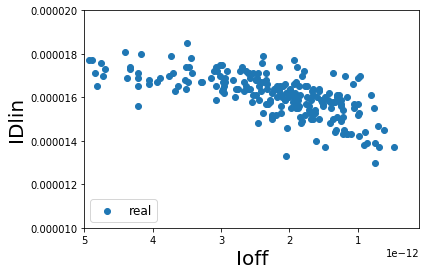

289


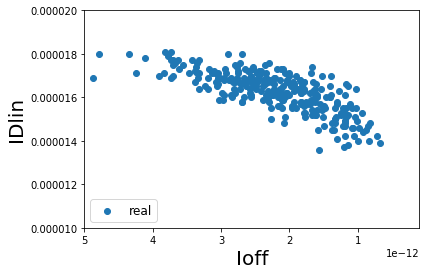

277


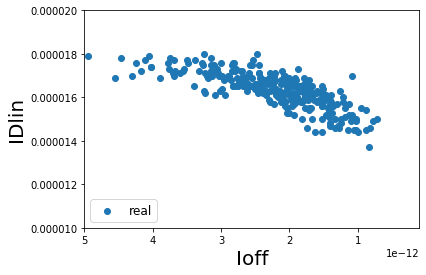

253


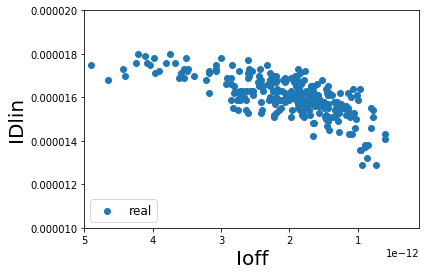

255


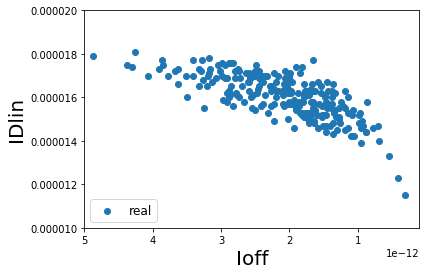

In [29]:
# TEST SET Visualize

import pandas as pd
import numpy as np

idx = 0

for i in range(num_of_cycle): 
    print(num_in_cycle[i])
    plt.scatter(real_test[idx:idx+num_in_cycle[i],0],real_test[idx:idx+num_in_cycle[i],2], label='real')
    plt.xlim(5e-12, 1e-13)
    plt.ylim(1e-5, 2e-5)
    plt.legend(loc='lower left', fontsize=12)
    plt.xlabel("Ioff", fontsize=20)
    plt.ylabel("IDlin", fontsize=20)
    plt.show()
    
    idx += num_in_cycle[i]


In [30]:
############################################### CHANGE HERE ##################################################

# type your result name

total_test_name = 'test_specificdate_201003_data_2020_LER_20200922_V007_testset_edit.csv_model_mlp_gan2_lr_5e-05_0.0001_0.0005_gan_hidden_dim_50_batch_size_25_noise_d_500_sample_num_250_pdrop_0.2.npy'

##############################################################################################################

total_result_test = np.load(total_test_name, allow_pickle=True)

test_sample_num = int(len(total_result_test)/5)
print("GENERATED SAMPLE shape: ",total_result_test.shape)
print("GENERATED SAMPLE NUM:", test_sample_num)

# checking nan value
print("any nan in real?: ", np.argwhere(np.isnan(real_test)))
print("any nan in generated?: ", np.argwhere(np.isnan(total_result_test)))

GENERATED SAMPLE shape:  (1250, 6)
GENERATED SAMPLE NUM: 250
any nan in real?:  []
any nan in generated?:  []


factor 0
0 232
Generated sample shape: (250, 6)
real sample shape: (232, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (232, 1)
minimum y value for each varaible: [4.75000000e-13 2.93338635e-05 1.30000000e-05 3.23000000e-01
 3.36000000e-01 6.07650000e+01 0.00000000e+00]
maximum y value for each varaible: [6.10000000e-12 4.48702917e-05 1.85000000e-05 3.78331233e-01
 3.82000000e-01 6.32420000e+01 1.00000000e+00]
X input [  0.625  17.007 173.857   1.      0.   ]


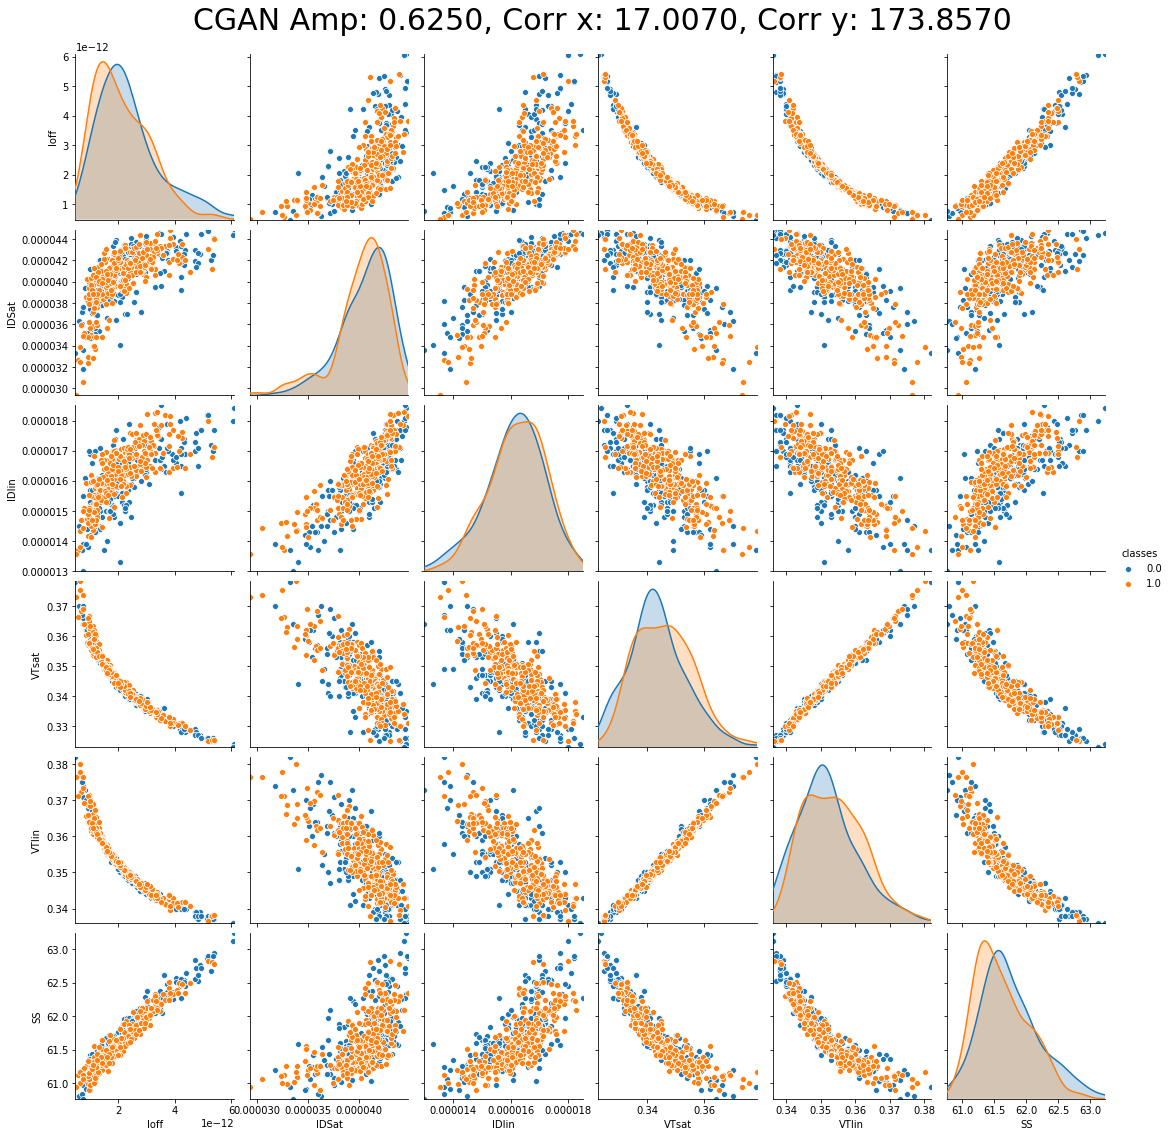

factor 1
232 521
Generated sample shape: (250, 6)
real sample shape: (289, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (289, 1)
minimum y value for each varaible: [6.7400e-13 3.2200e-05 1.3600e-05 3.2400e-01 3.3600e-01 6.0973e+01
 0.0000e+00]
maximum y value for each varaible: [6.0100e-12 4.5100e-05 1.8100e-05 3.6900e-01 3.7600e-01 6.3091e+01
 1.0000e+00]
X input [ 0.557 80.919 80.57   1.     0.   ]


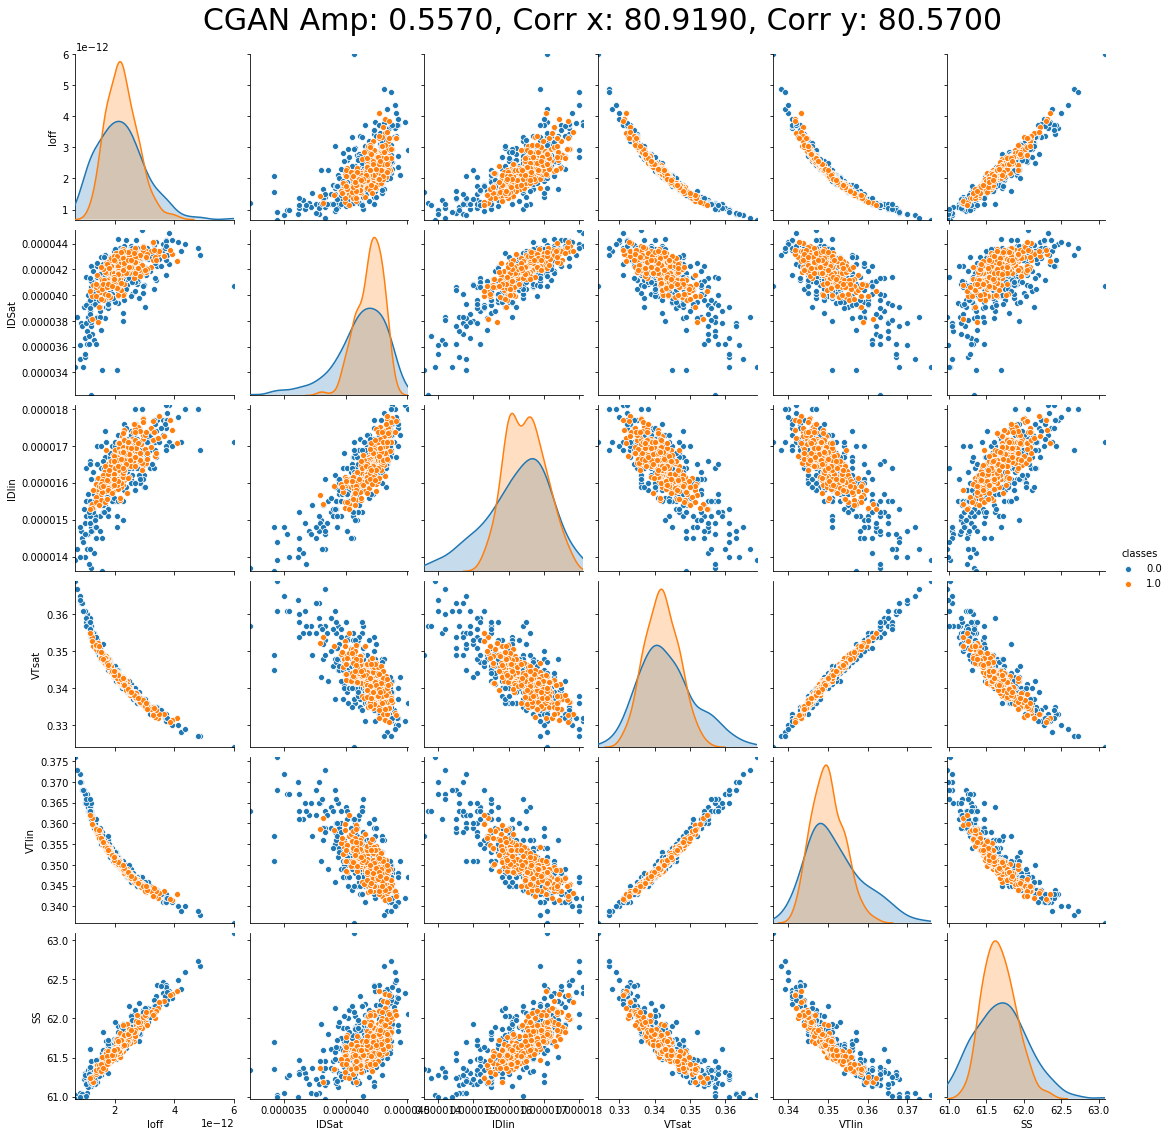

factor 2
521 798
Generated sample shape: (250, 6)
real sample shape: (277, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (277, 1)
minimum y value for each varaible: [7.1800e-13 3.3500e-05 1.3700e-05 3.2600e-01 3.3800e-01 6.0853e+01
 0.0000e+00]
maximum y value for each varaible: [5.0800e-12 4.4700e-05 1.8400e-05 3.6800e-01 3.7400e-01 6.2832e+01
 1.0000e+00]
X input [ 0.505 48.624 67.994  1.     0.   ]


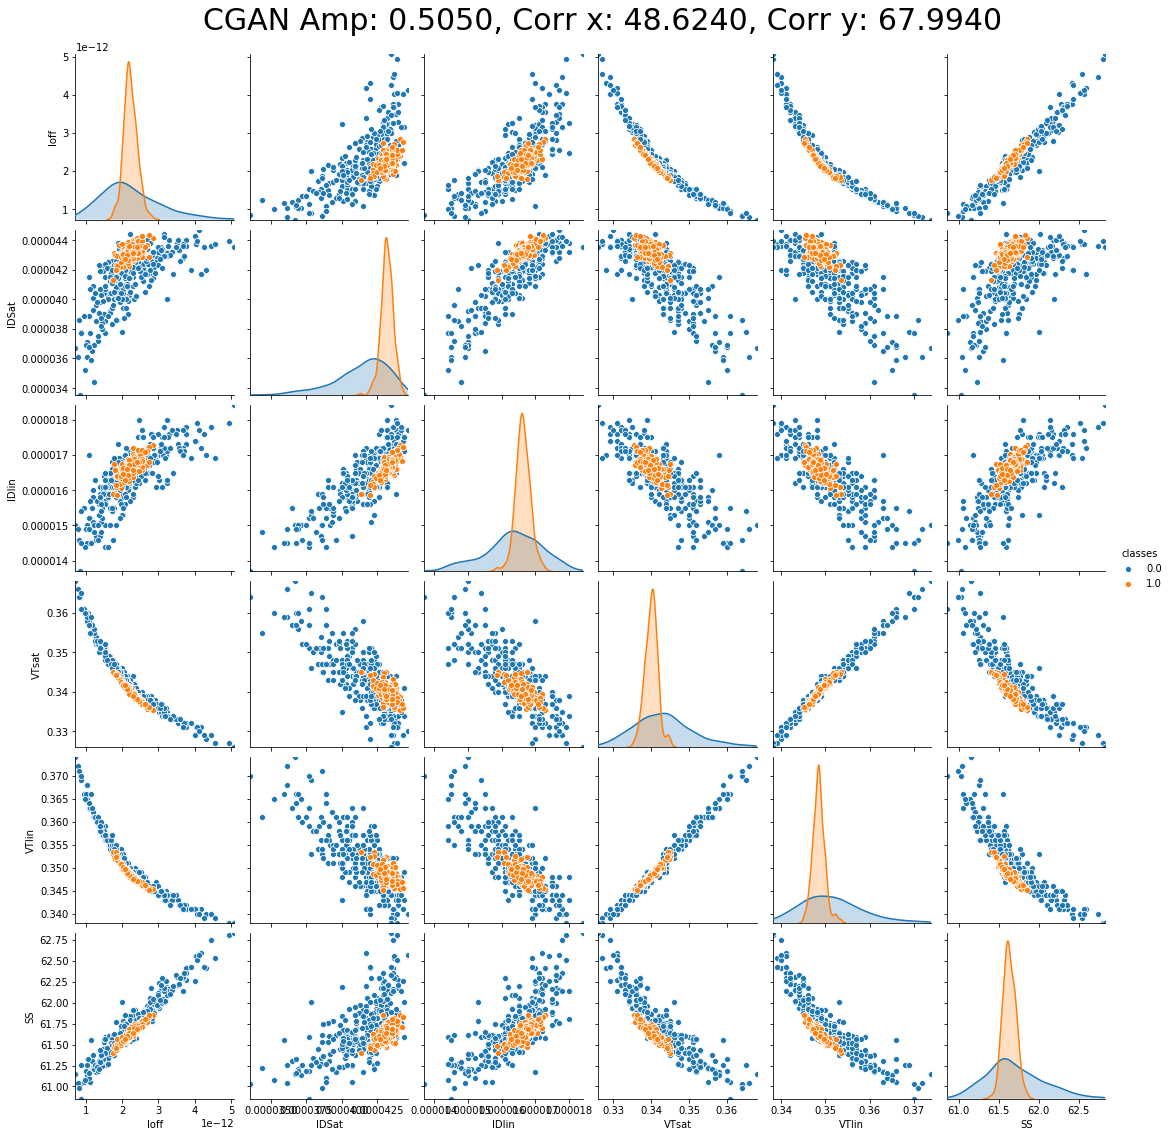

factor 3
798 1051
Generated sample shape: (250, 6)
real sample shape: (253, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (253, 1)
minimum y value for each varaible: [5.9900e-13 3.1700e-05 1.2900e-05 3.2300e-01 3.3500e-01 6.0881e+01
 0.0000e+00]
maximum y value for each varaible: [6.050e-12 4.460e-05 1.810e-05 3.730e-01 3.780e-01 6.304e+01 1.000e+00]
X input [ 0.56  25.429 69.397  1.     0.   ]


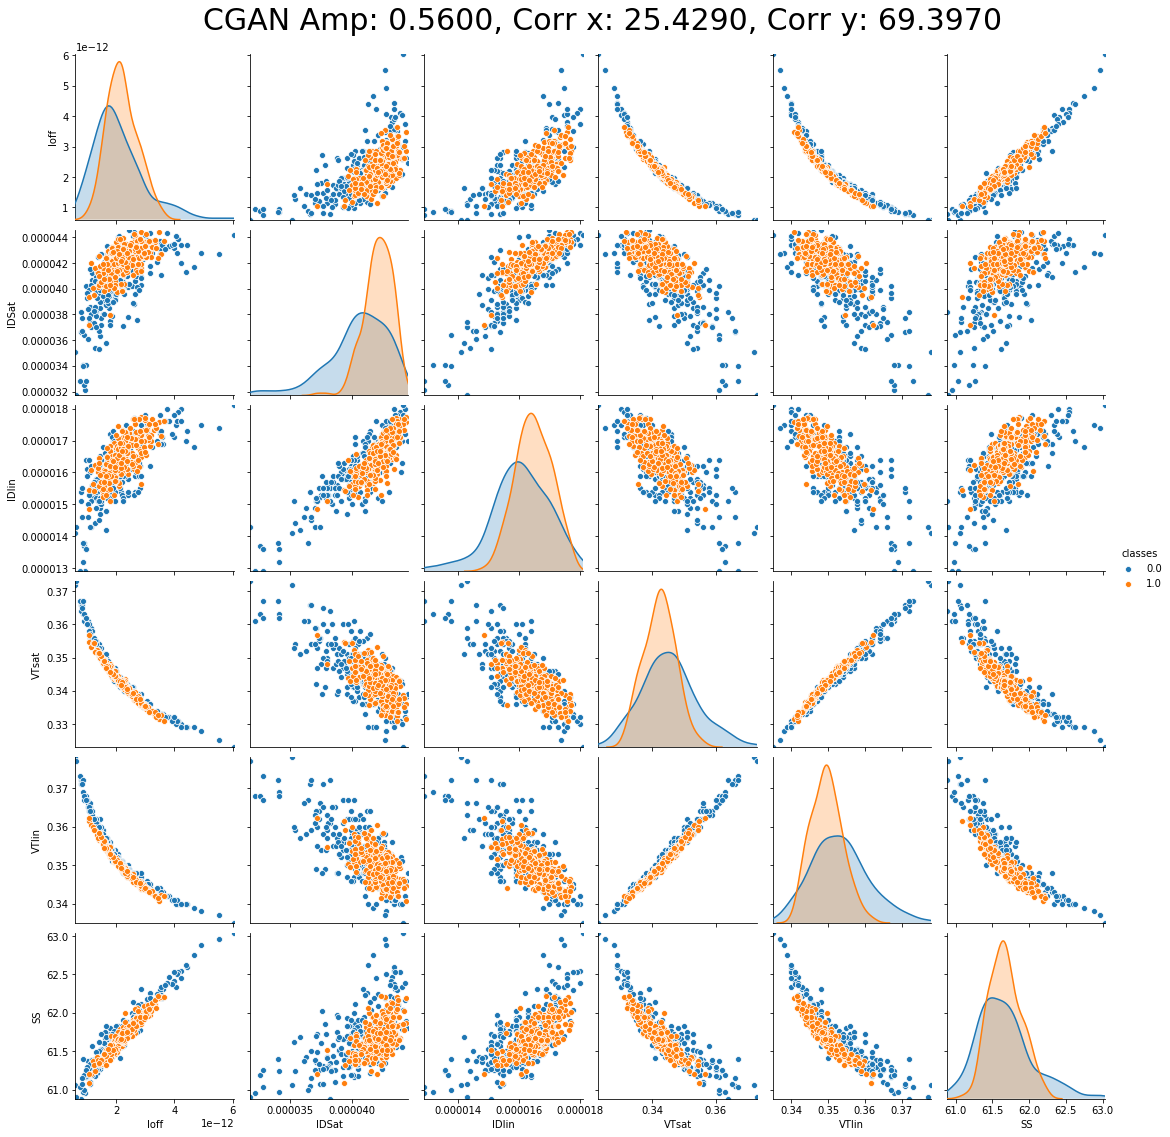

factor 4
1051 1306
Generated sample shape: (250, 6)
real sample shape: (255, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (255, 1)
minimum y value for each varaible: [3.02000000e-13 2.80000000e-05 1.15000000e-05 3.21024826e-01
 3.35000000e-01 6.08140000e+01 0.00000000e+00]
maximum y value for each varaible: [6.79819634e-12 4.50000000e-05 1.86517773e-05 3.94000000e-01
 3.97000000e-01 6.33819007e+01 1.00000000e+00]
X input [ 0.637 69.149 65.33   1.     0.   ]


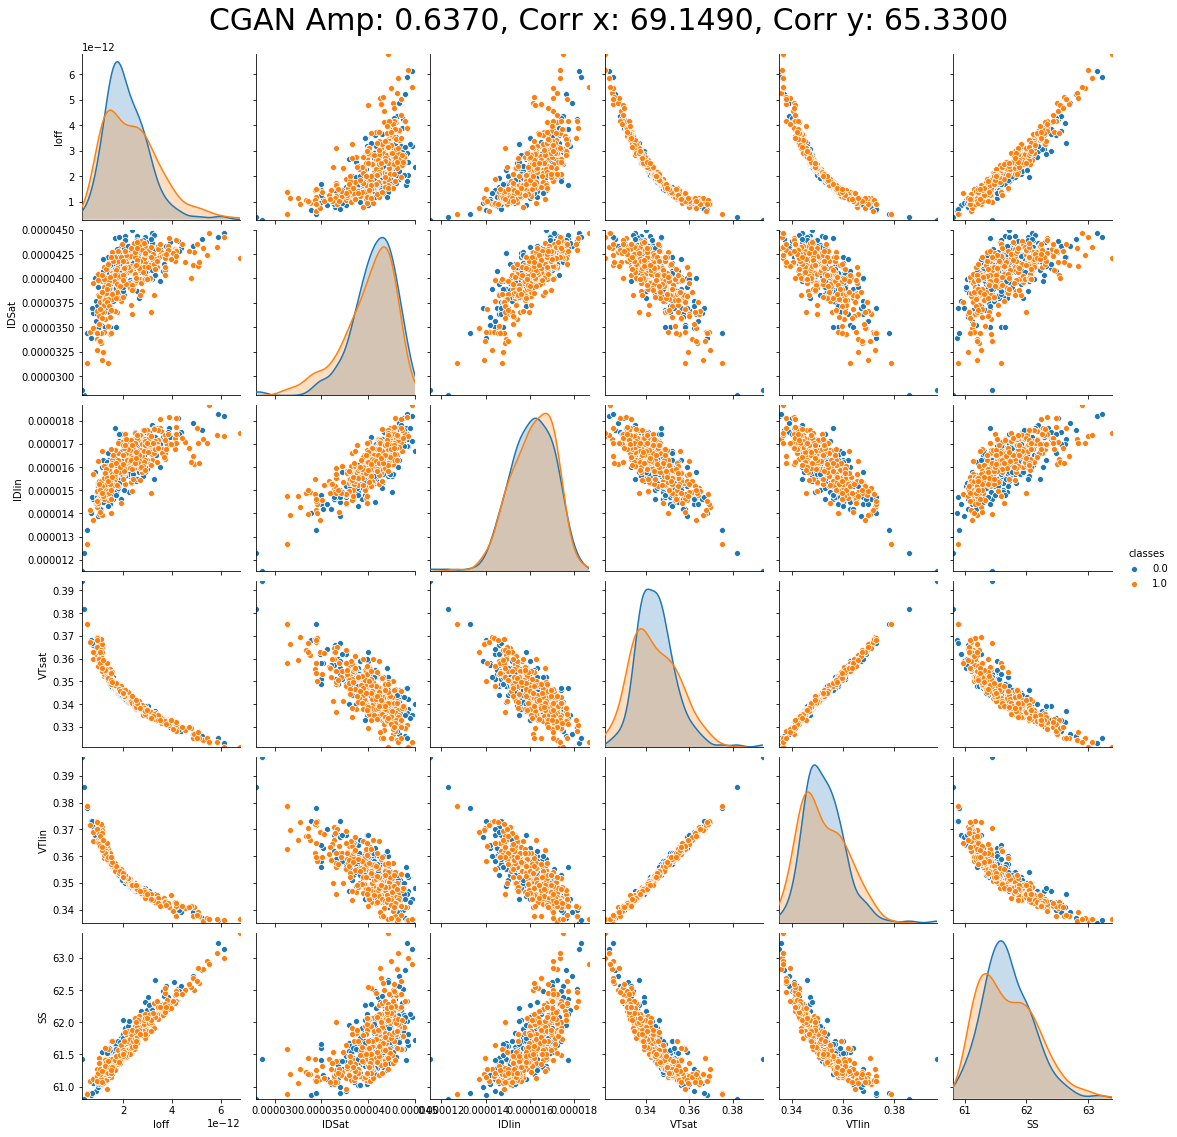

In [31]:
import pandas as pd
import numpy as np

############################################### CHANGE HERE ##################################################

# type the X index of test sample ( 0 ~ 5 )
for factor in range(5):
    
    print("factor", factor)


    ##############################################################################################################
    """
    for i in range(6):
        print(np.min(total_result[:,i]))
        print(np.max(total_result[:,i]))
        print(np.min(real[:,i]))
        print(np.max(real[:,i]))
    """

    # generated sample
    print(sum(num_in_cycle[:factor]),sum(num_in_cycle[:factor])+num_in_cycle[factor])
    test_gan_matrix_plot = total_result_test[factor * test_sample_num:(factor+1)*test_sample_num]
    print("Generated sample shape:", test_gan_matrix_plot.shape)

    # real sample
    test_real_matrix_plot = real_test[sum(num_in_cycle[:factor]):sum(num_in_cycle[:factor])+num_in_cycle[factor]]
    print("real sample shape:", test_real_matrix_plot.shape)
    print()

    # Assigning class(generated: 0, real:1 ) for visualization

    print("Assigning class for visualization (generated: 0, real:1 )")

    test_gan_cls = np.ones((test_sample_num, 1))
    print("generated sample class shape:", test_gan_cls.shape)
    test_real_cls = np.zeros((num_in_cycle[factor], 1))
    print("real sample class shape:", test_real_cls.shape)

    test_temp1 = np.hstack([test_gan_matrix_plot, test_gan_cls])
    test_temp2 = np.hstack([test_real_matrix_plot, test_real_cls])

    # TOTAL PANDAS DATA
    total_test_matrix_plot = np.vstack([test_temp1, test_temp2])
    # print(total_matrix_plot.shape)

    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(total_test_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
    # print(df1)

#    print(df1_test)
    
        # min, max for generated Y value ( used for scatter plot limit standard )

    test_min_list = total_test_matrix_plot.min(axis=0)
    test_max_list = total_test_matrix_plot.max(axis=0)
    print("minimum y value for each varaible:", test_min_list)
    print("maximum y value for each varaible:", test_max_list)

    X_test = dataset_test.test_X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test, hue = 'classes')
    for i in range(6):
        g.fig.suptitle("CGAN Amp: {:.4f}, Corr x: {:.4f}, Corr y: {:.4f}".format(X_test[0], X_test[1], X_test[2]), y=1.04, fontsize=30)
        g.axes[i,i].set_xlim((test_min_list[i],test_max_list[i]))
        g.axes[i,i].set_ylim((test_min_list[i],test_max_list[i]))
    plt.show()


    ### 파란색이 real 주황색이 generated


minimum y value for each varaible: [3.0200e-13 2.8000e-05 1.1500e-05 3.2300e-01 3.3500e-01 6.0765e+01]
maximum y value for each varaible: [6.1200e-12 4.5100e-05 1.8500e-05 3.9400e-01 3.9700e-01 6.3242e+01]
minimum y value for each varaible: [4.84975341e-13 2.93338635e-05 1.26941641e-05 3.21024826e-01
 3.35847292e-01 6.08851544e+01]
maximum y value for each varaible: [6.79819634e-12 4.48702917e-05 1.86517773e-05 3.78331233e-01
 3.80091809e-01 6.33819007e+01]
[3.02e-13, 2.8000000000000003e-05, 1.15e-05, 0.32102482579648495, 0.335, 60.765]
[6.798196337462481e-12, 4.51e-05, 1.865177728177514e-05, 0.39399999999999996, 0.397, 63.381900668144226]
factor 0
0 232
Generated sample shape: (250, 6)
real sample shape: (232, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (232, 1)
X input [  0.625  17.007 173.857   1.      0.   ]


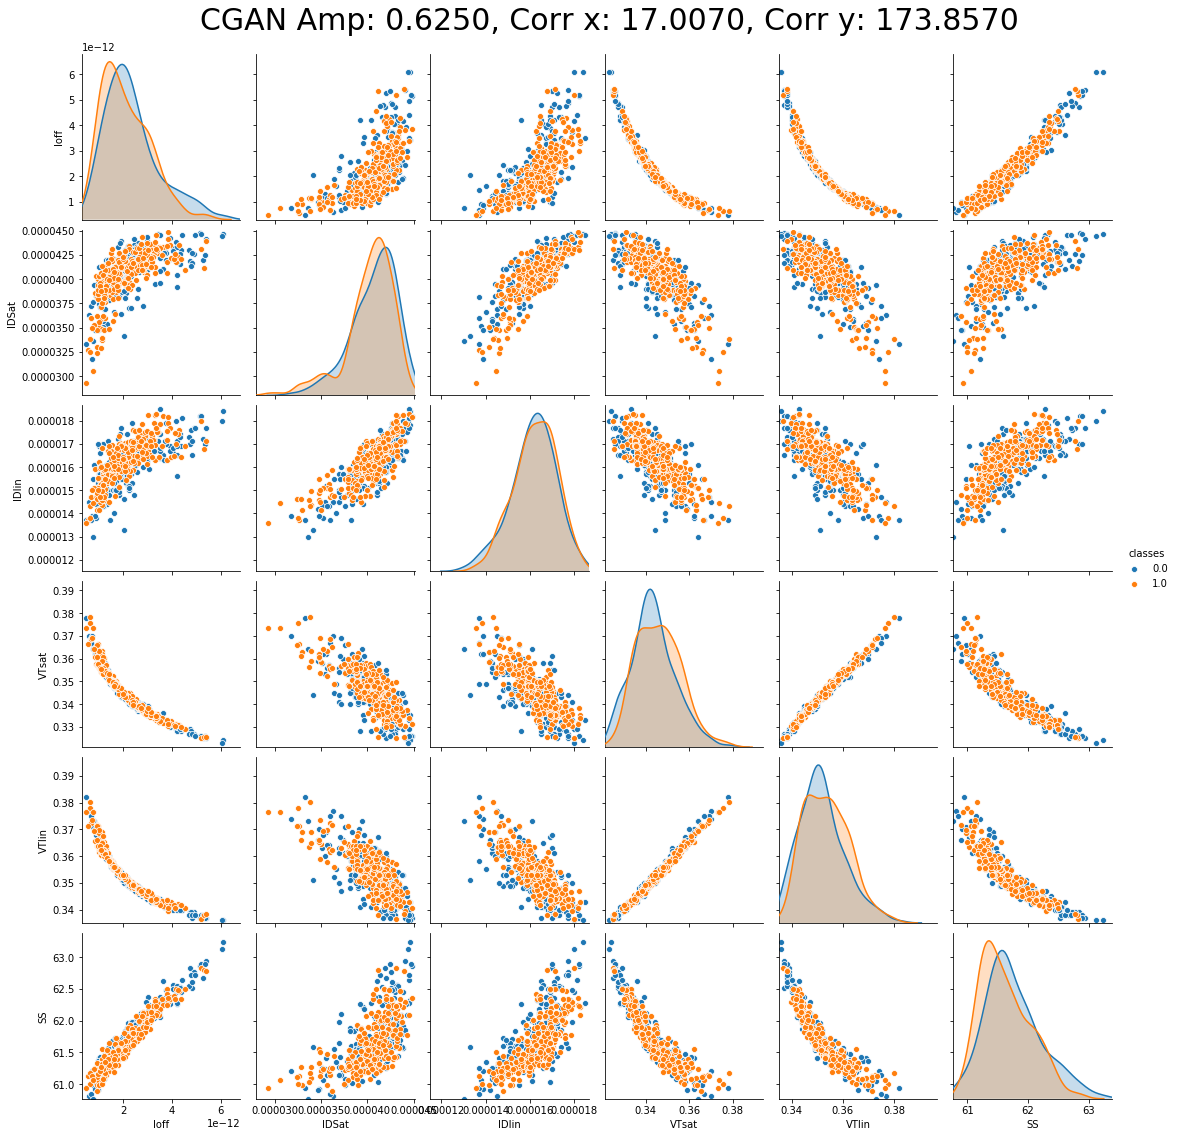

factor 1
232 521
Generated sample shape: (250, 6)
real sample shape: (289, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (289, 1)
X input [ 0.557 80.919 80.57   1.     0.   ]


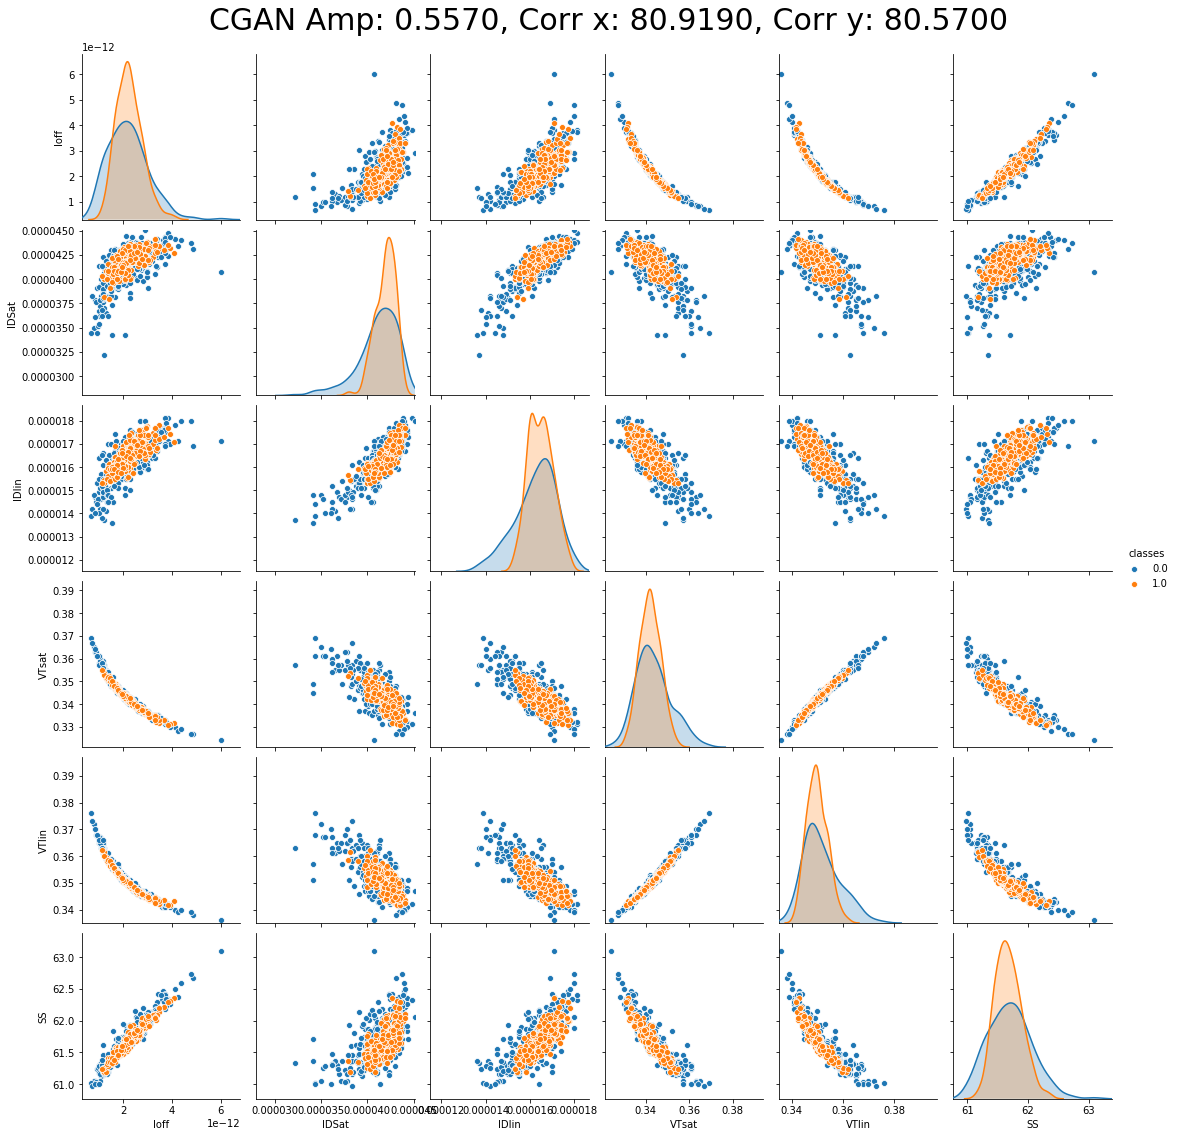

factor 2
521 798
Generated sample shape: (250, 6)
real sample shape: (277, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (277, 1)
X input [ 0.505 48.624 67.994  1.     0.   ]


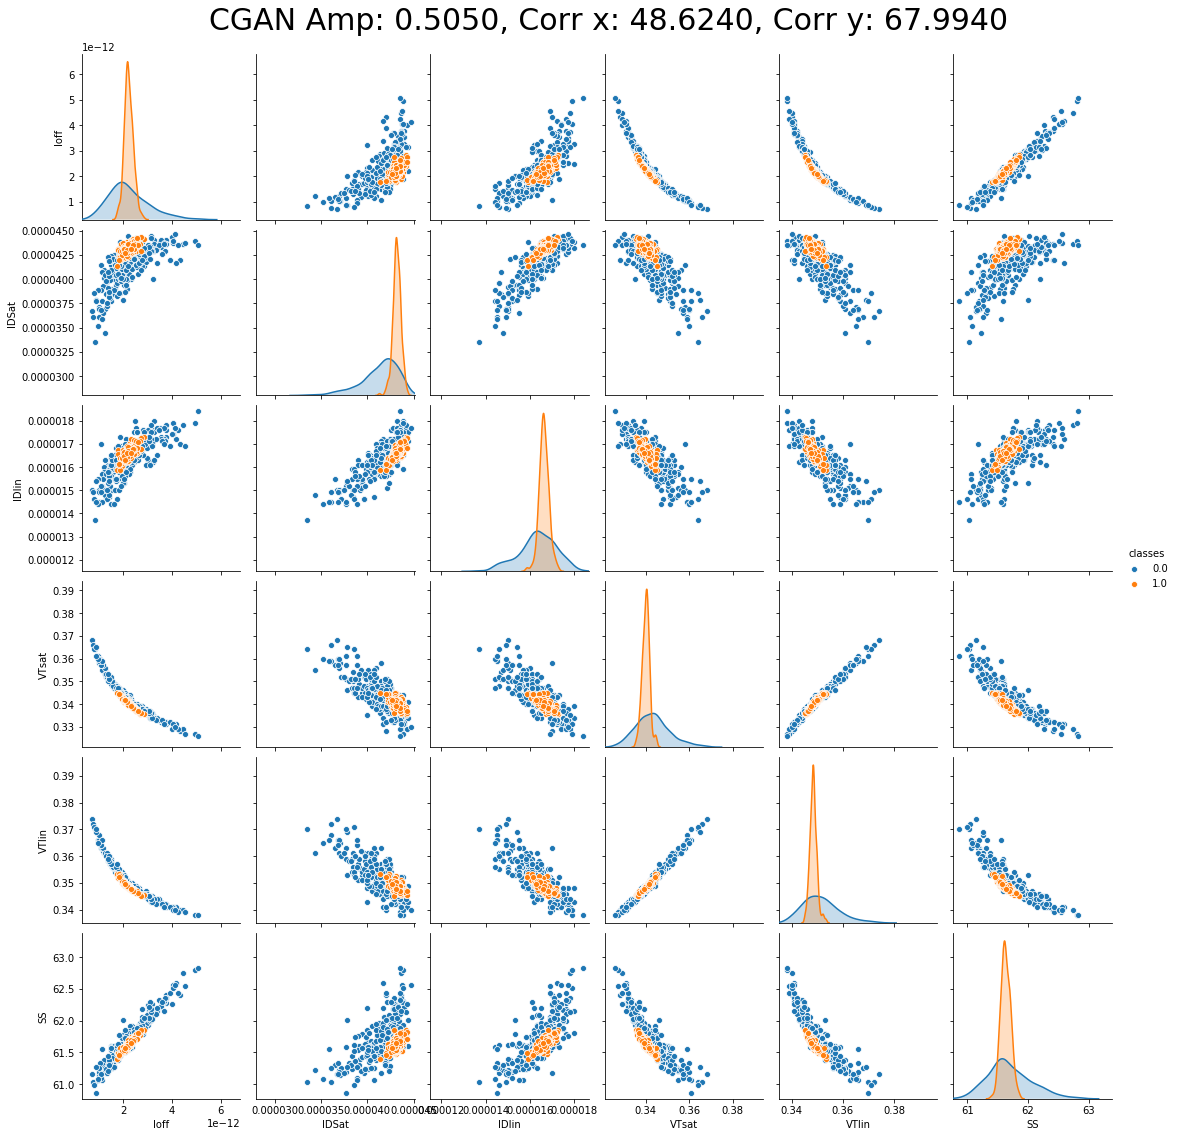

factor 3
798 1051
Generated sample shape: (250, 6)
real sample shape: (253, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (253, 1)
X input [ 0.56  25.429 69.397  1.     0.   ]


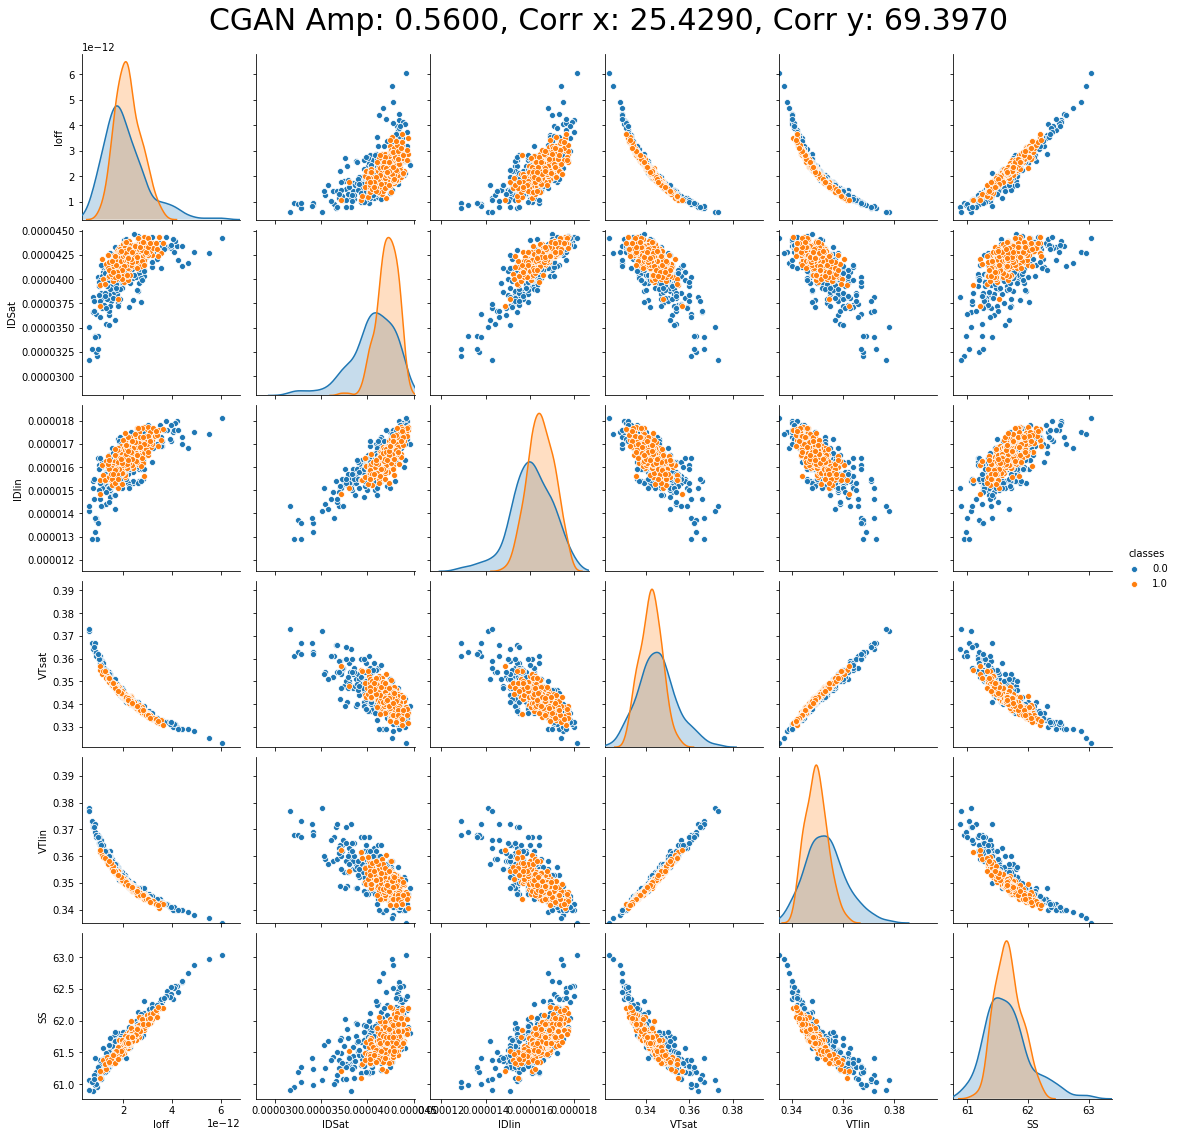

factor 4
1051 1306
Generated sample shape: (250, 6)
real sample shape: (255, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (255, 1)
X input [ 0.637 69.149 65.33   1.     0.   ]


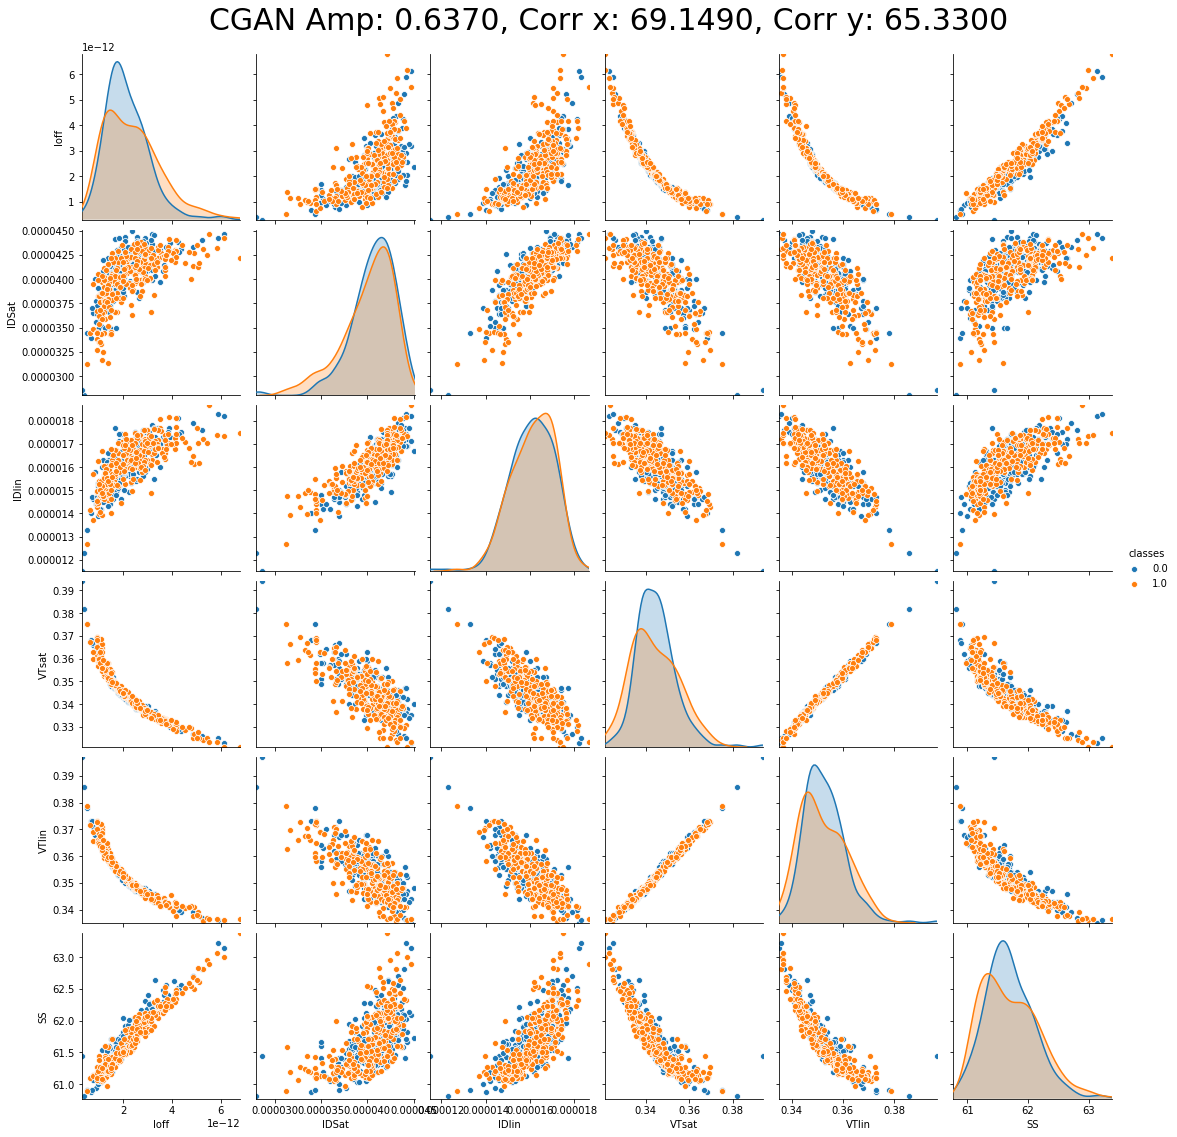

In [32]:
import pandas as pd
import numpy as np

min1_per_out_v_test = real_test.min(axis=0)
max1_per_out_v_test = real_test.max(axis=0)
print("minimum y value for each varaible:", min1_per_out_v_test)
print("maximum y value for each varaible:", max1_per_out_v_test)

min2_per_out_v_test = total_result_test.min(axis=0)
max2_per_out_v_test = total_result_test.max(axis=0)
print("minimum y value for each varaible:", min2_per_out_v_test)
print("maximum y value for each varaible:", max2_per_out_v_test)

min_per_out_v_test = []
max_per_out_v_test = []

for i in range(6):
    min_per_out_v_test.append(min1_per_out_v_test[i] if min1_per_out_v_test[i] < min2_per_out_v_test[i] else min2_per_out_v_test[i])
    max_per_out_v_test.append(max1_per_out_v_test[i] if max1_per_out_v_test[i] > max2_per_out_v_test[i] else max2_per_out_v_test[i])

print(min_per_out_v_test)
print(max_per_out_v_test)

############################################### CHANGE HERE ##################################################

# type the X index of test sample ( 0 ~ 5 )
for factor in range(5):
    
    print("factor", factor)


    ##############################################################################################################
    """
    for i in range(6):
        print(np.min(total_result[:,i]))
        print(np.max(total_result[:,i]))
        print(np.min(real[:,i]))
        print(np.max(real[:,i]))
    """

    # generated sample
    print(sum(num_in_cycle[:factor]),sum(num_in_cycle[:factor])+num_in_cycle[factor])
    test_gan_matrix_plot = total_result_test[factor * test_sample_num:(factor+1)*test_sample_num]
    print("Generated sample shape:", test_gan_matrix_plot.shape)

    # real sample
    test_real_matrix_plot = real_test[sum(num_in_cycle[:factor]):sum(num_in_cycle[:factor])+num_in_cycle[factor]]
    print("real sample shape:", test_real_matrix_plot.shape)
    print()

    # Assigning class(generated: 0, real:1 ) for visualization

    print("Assigning class for visualization (generated: 0, real:1 )")

    test_gan_cls = np.ones((test_sample_num, 1))
    print("generated sample class shape:", test_gan_cls.shape)
    test_real_cls = np.zeros((num_in_cycle[factor], 1))
    print("real sample class shape:", test_real_cls.shape)

    test_temp1 = np.hstack([test_gan_matrix_plot, test_gan_cls])
    test_temp2 = np.hstack([test_real_matrix_plot, test_real_cls])

    # TOTAL PANDAS DATA
    total_test_matrix_plot = np.vstack([test_temp1, test_temp2])
    # print(total_matrix_plot.shape)

    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(total_test_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
    # print(df1)

#    print(df1_test)
    
    X_test = dataset_test.test_X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test, hue = 'classes')
    for i in range(6):
        g.fig.suptitle("CGAN Amp: {:.4f}, Corr x: {:.4f}, Corr y: {:.4f}".format(X_test[0], X_test[1], X_test[2]), y=1.04, fontsize=30)
        g.axes[i,i].set_xlim((min_per_out_v_test[i],max_per_out_v_test[i]))
        g.axes[i,i].set_ylim((min_per_out_v_test[i],max_per_out_v_test[i]))
    plt.show()


    ### 파란색이 real 주황색이 generated

In [20]:
name = '2020_LER_20200804_testset.csv'
datatype = 'n'

dataset_test = sample_utils.get_dataset_test(name, datatype)
num_in_cycle = [50, 50, 50, 50, 50] 
num_of_cycle = 5

# real
real_test = dataset_test.test_Y

print(real_test)


250
      amp.  corr.x   corr.y  PNMOS_N
0    0.625  17.007  173.857        1
1    0.625  17.007  173.857        1
2    0.625  17.007  173.857        1
3    0.625  17.007  173.857        1
4    0.625  17.007  173.857        1
..     ...     ...      ...      ...
245  0.637  69.149   65.330        1
246  0.637  69.149   65.330        1
247  0.637  69.149   65.330        1
248  0.637  69.149   65.330        1
249  0.637  69.149   65.330        1

[250 rows x 4 columns]
             Ioff     IDSAT     IDLIN  VTSAT  VTLIN      SS
0    1.960000e-12  0.000042  0.000016  0.343  0.353  61.501
1    6.140000e-13  0.000036  0.000014  0.370  0.377  60.804
2    7.440000e-13  0.000032  0.000014  0.370  0.374  61.200
3    1.480000e-12  0.000041  0.000016  0.352  0.358  61.429
4    1.930000e-12  0.000044  0.000018  0.344  0.353  61.569
..            ...       ...       ...    ...    ...     ...
245  2.440000e-12  0.000041  0.000017  0.342  0.349  62.040
246  3.010000e-12  0.000041  0.000017  0.339  0.

minimum y value for each varaible: [6.1400e-13 3.1800e-05 1.2900e-05 3.2600e-01 3.3700e-01 6.0804e+01]
maximum y value for each varaible: [5.2200e-12 4.5000e-05 1.8200e-05 3.7000e-01 3.7700e-01 6.2878e+01]
minimum y value for each varaible: [4.11768059e-13 3.14425597e-05 1.34282643e-05 3.25648695e-01
 3.39298829e-01 6.08326057e+01]
maximum y value for each varaible: [5.56043601e-12 4.44521675e-05 1.77762372e-05 3.67982024e-01
 3.73470582e-01 6.29642638e+01]
[4.1176805888609724e-13, 3.144255970255472e-05, 1.29e-05, 0.325648695230484, 0.337, 60.803999999999995]
[5.5604360092026406e-12, 4.5e-05, 1.82e-05, 0.37, 0.377, 62.964263796806335]
factor 0
0 50
Generated sample shape: (50, 6)
real sample shape: (50, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (50, 1)
real sample class shape: (50, 1)
X input [  0.625  17.007 173.857   1.      0.   ]


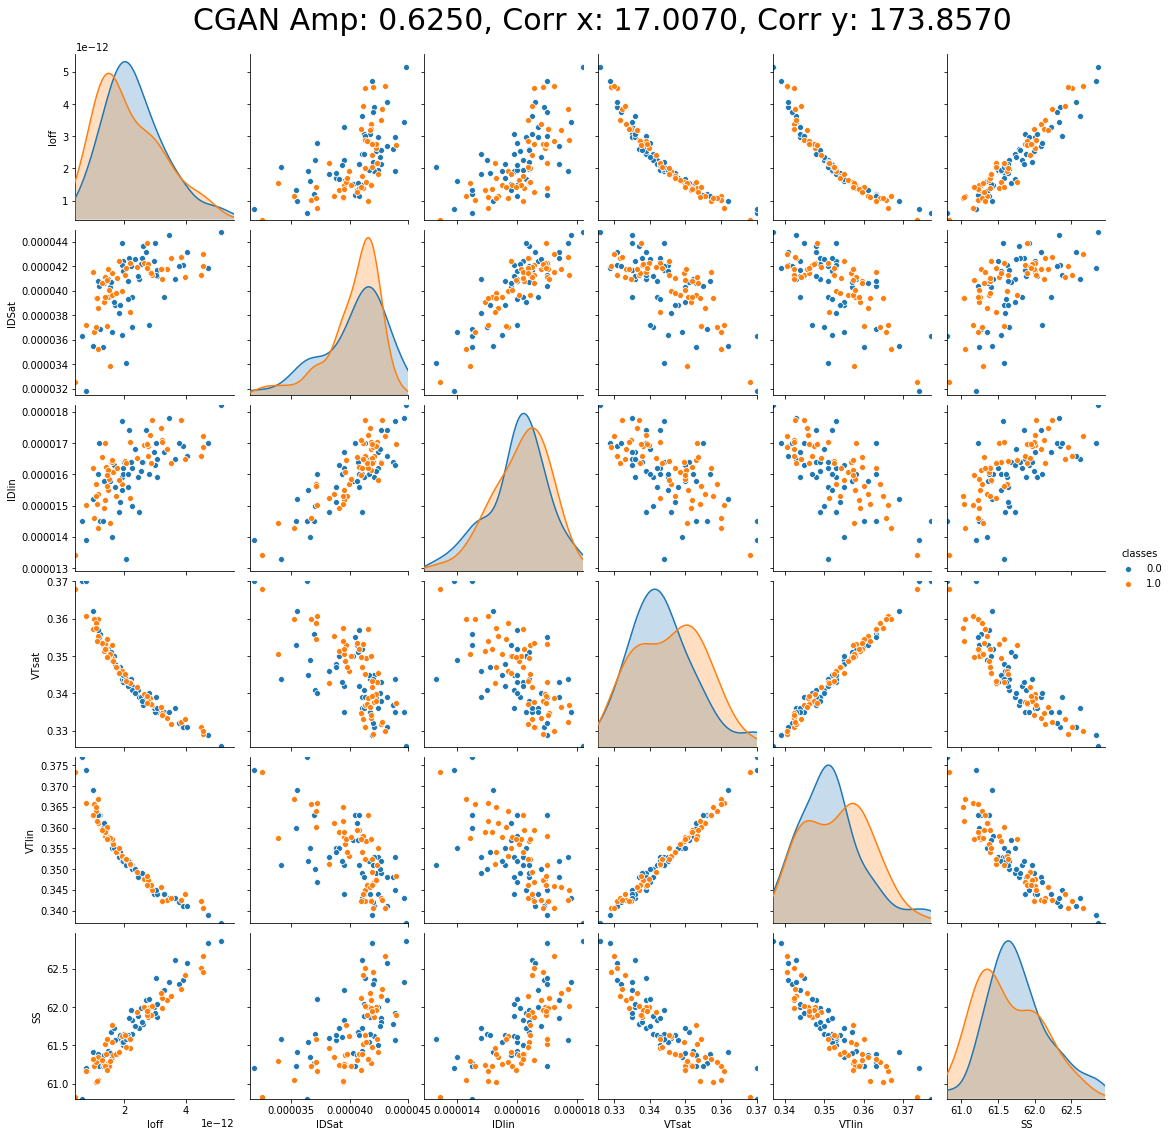

factor 1
50 100
Generated sample shape: (50, 6)
real sample shape: (50, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (50, 1)
real sample class shape: (50, 1)
X input [ 0.557 80.919 80.57   1.     0.   ]


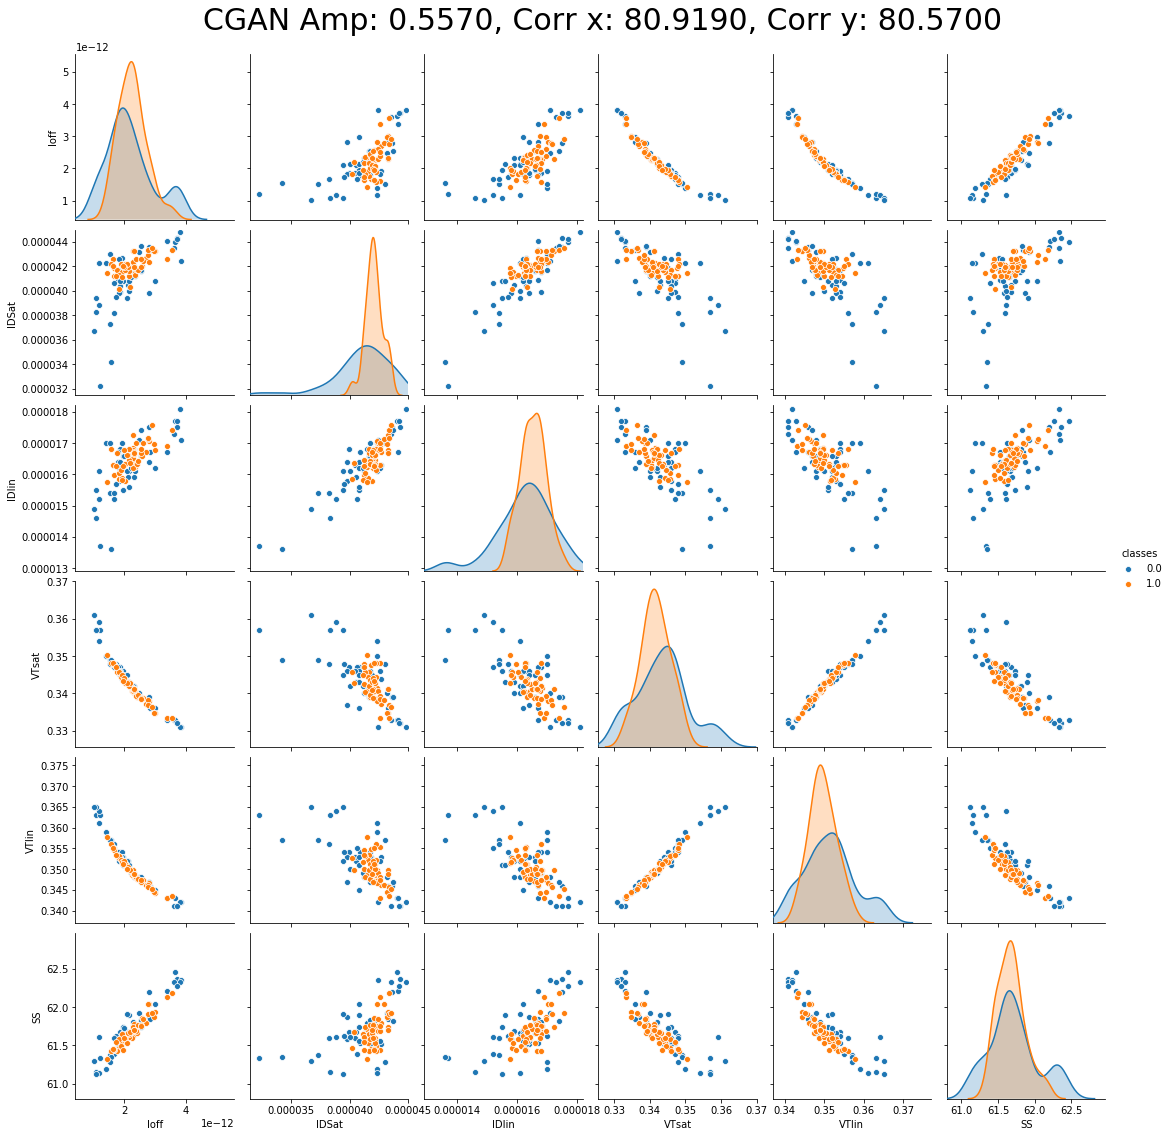

factor 2
100 150
Generated sample shape: (50, 6)
real sample shape: (50, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (50, 1)
real sample class shape: (50, 1)
X input [ 0.505 48.624 67.994  1.     0.   ]


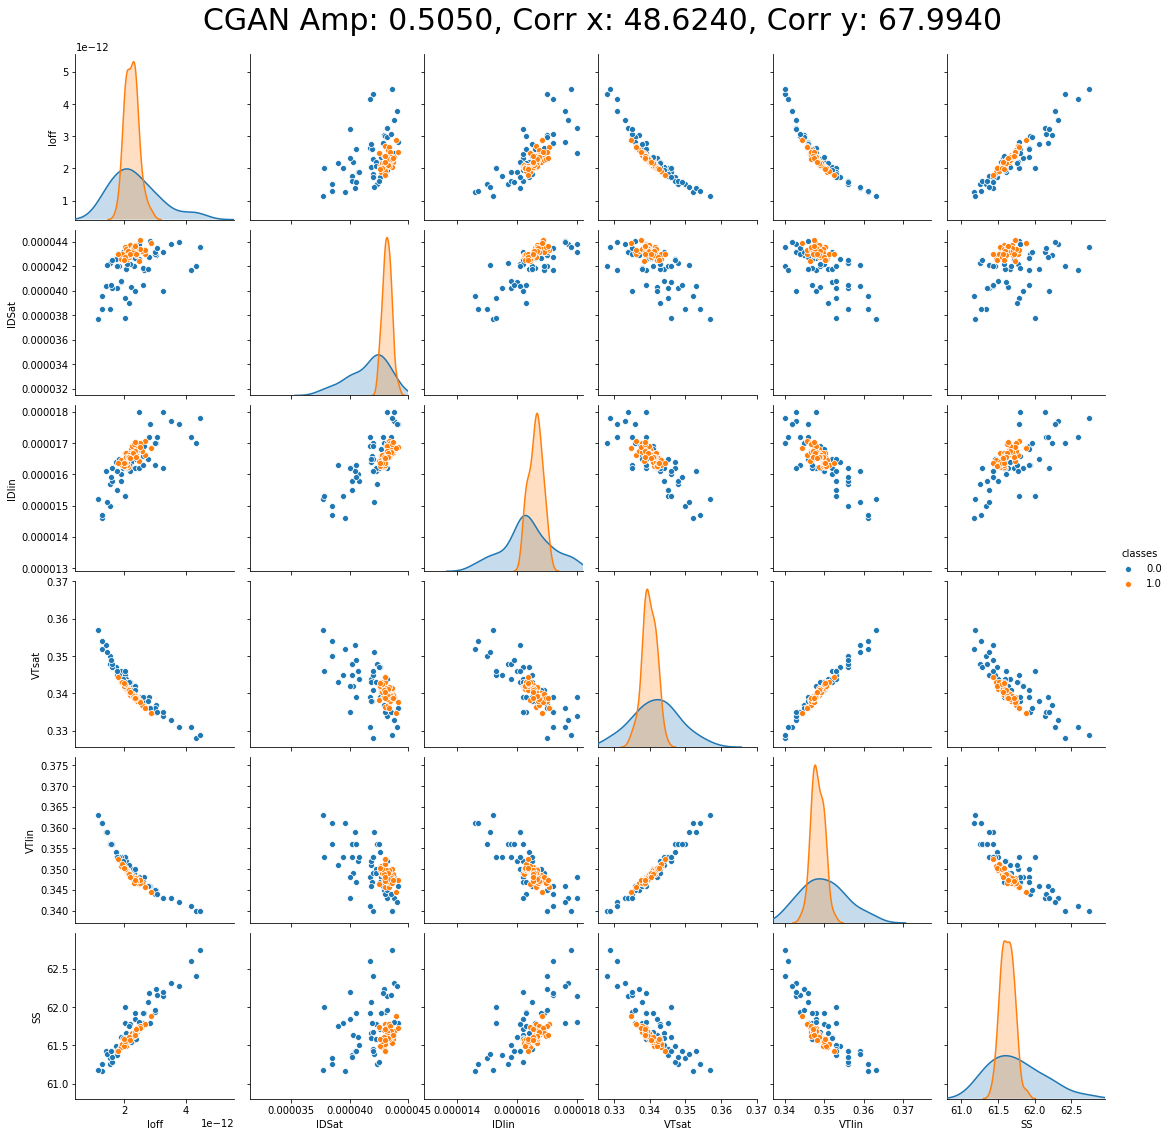

factor 3
150 200
Generated sample shape: (50, 6)
real sample shape: (50, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (50, 1)
real sample class shape: (50, 1)
X input [ 0.56  25.429 69.397  1.     0.   ]


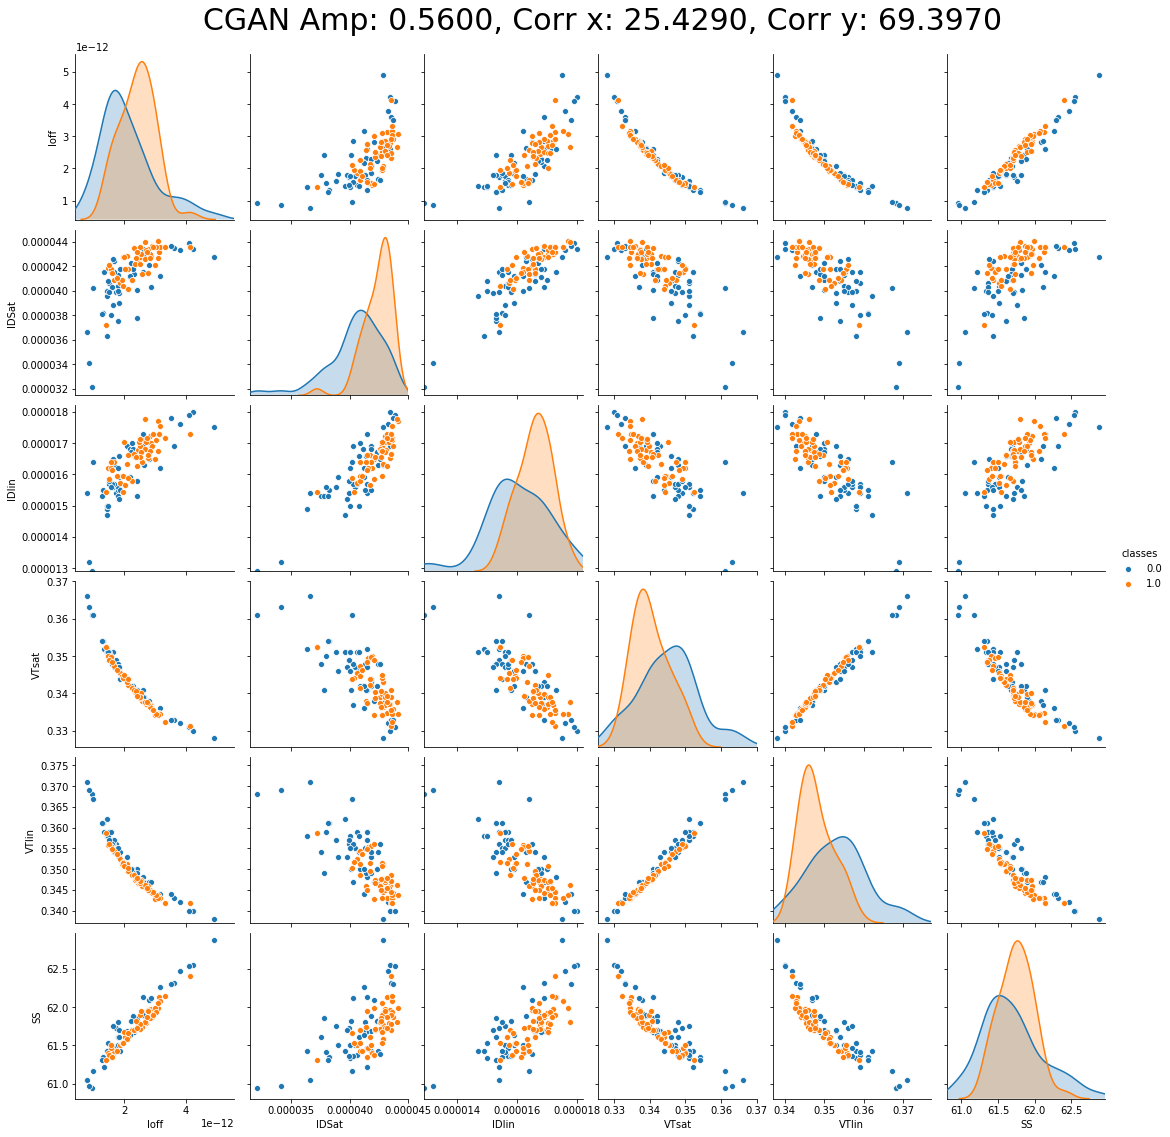

factor 4
200 250
Generated sample shape: (50, 6)
real sample shape: (50, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (50, 1)
real sample class shape: (50, 1)
X input [ 0.637 69.149 65.33   1.     0.   ]


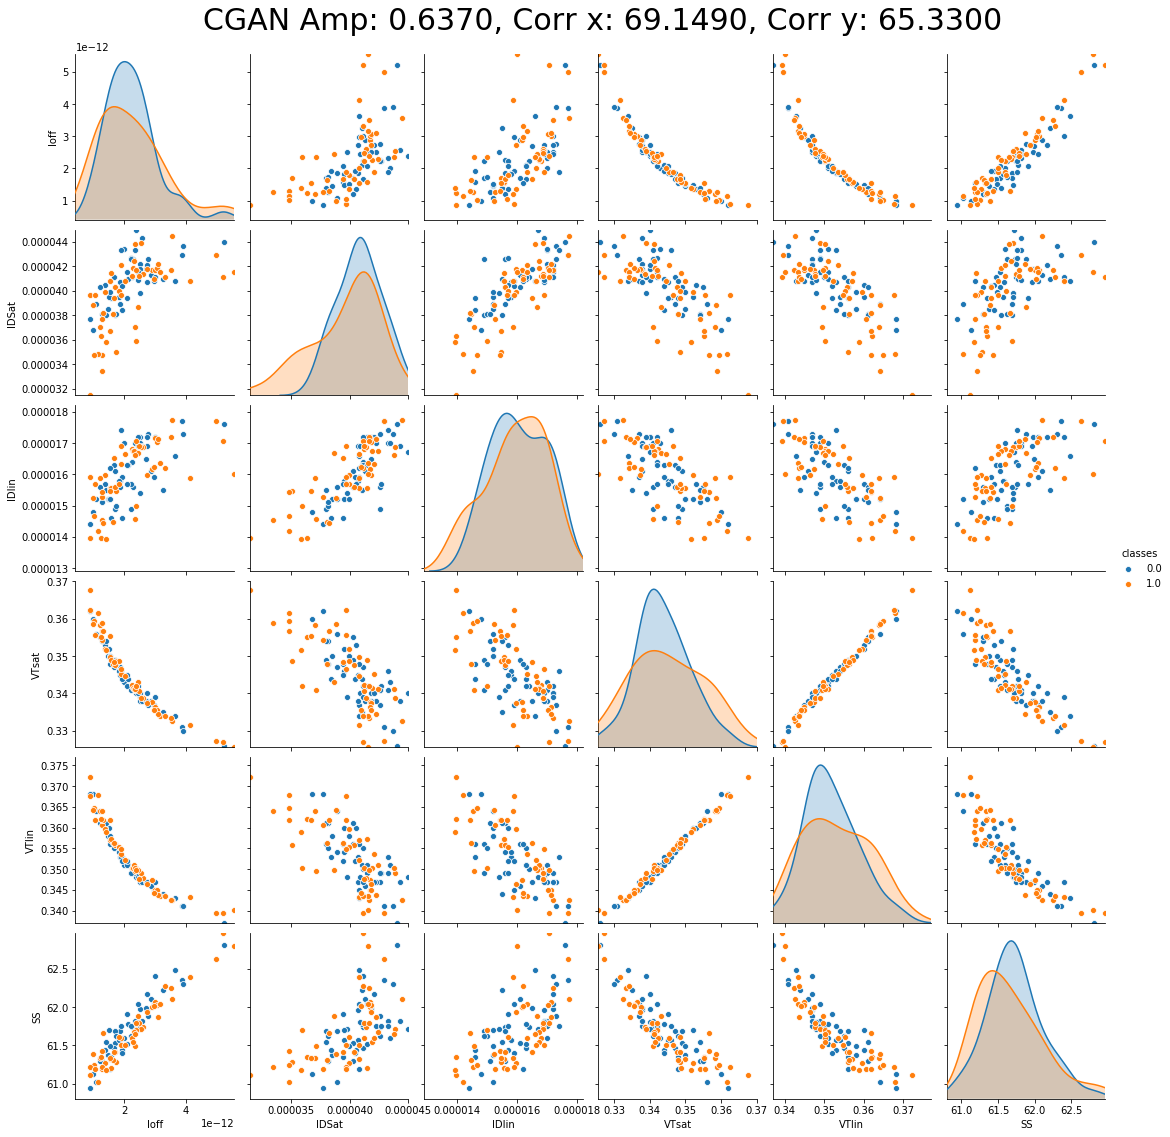

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

min1_per_out_v_test = real_test.min(axis=0)
max1_per_out_v_test = real_test.max(axis=0)
print("minimum y value for each varaible:", min1_per_out_v_test)
print("maximum y value for each varaible:", max1_per_out_v_test)

min2_per_out_v_test = total_result_test.min(axis=0)
max2_per_out_v_test = total_result_test.max(axis=0)
print("minimum y value for each varaible:", min2_per_out_v_test)
print("maximum y value for each varaible:", max2_per_out_v_test)

min_per_out_v_test = []
max_per_out_v_test = []

for i in range(6):
    min_per_out_v_test.append(min1_per_out_v_test[i] if min1_per_out_v_test[i] < min2_per_out_v_test[i] else min2_per_out_v_test[i])
    max_per_out_v_test.append(max1_per_out_v_test[i] if max1_per_out_v_test[i] > max2_per_out_v_test[i] else max2_per_out_v_test[i])

print(min_per_out_v_test)
print(max_per_out_v_test)

############################################### CHANGE HERE ##################################################

# type the X index of test sample ( 0 ~ 5 )
for factor in range(5):
    
    print("factor", factor)


    ##############################################################################################################
    """
    for i in range(6):
        print(np.min(total_result[:,i]))
        print(np.max(total_result[:,i]))
        print(np.min(real[:,i]))
        print(np.max(real[:,i]))
    """

    # generated sample
    print(sum(num_in_cycle[:factor]),sum(num_in_cycle[:factor])+num_in_cycle[factor])
    test_gan_matrix_plot = total_result_test[factor * test_sample_num:(factor+1)*test_sample_num]
    print("Generated sample shape:", test_gan_matrix_plot.shape)

    # real sample
    test_real_matrix_plot = real_test[sum(num_in_cycle[:factor]):sum(num_in_cycle[:factor])+num_in_cycle[factor]]
    print("real sample shape:", test_real_matrix_plot.shape)
    print()

    # Assigning class(generated: 0, real:1 ) for visualization

    print("Assigning class for visualization (generated: 0, real:1 )")

    test_gan_cls = np.ones((test_sample_num, 1))
    print("generated sample class shape:", test_gan_cls.shape)
    test_real_cls = np.zeros((num_in_cycle[factor], 1))
    print("real sample class shape:", test_real_cls.shape)

    test_temp1 = np.hstack([test_gan_matrix_plot, test_gan_cls])
    test_temp2 = np.hstack([test_real_matrix_plot, test_real_cls])

    # TOTAL PANDAS DATA
    total_test_matrix_plot = np.vstack([test_temp1, test_temp2])
    # print(total_matrix_plot.shape)

    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(total_test_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
    # print(df1)

#    print(df1_test)
    
    X_test = dataset_test.test_X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test, hue = 'classes')
    for i in range(6):
        g.fig.suptitle("CGAN Amp: {:.4f}, Corr x: {:.4f}, Corr y: {:.4f}".format(X_test[0], X_test[1], X_test[2]), y=1.04, fontsize=30)
        g.axes[i,i].set_xlim((min_per_out_v_test[i],max_per_out_v_test[i]))
        g.axes[i,i].set_ylim((min_per_out_v_test[i],max_per_out_v_test[i]))
    plt.show()


    ### 파란색이 real 주황색이 generated